# Introduce RNN


In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

# Working the sequence

  ## Autoregressive Models

### Autoregressove

Dưới đây là biểu thức của 4 thuật toán giải mã mà bạn đã đề cập:

1. **Greedy Decoding (Giải mã tham lam):**

   Tại mỗi bước \( t \), Greedy Decoding chọn từ \( w_t \) có xác suất cao nhất từ mô hình:
   \[
   w_t = \arg\max_{w} P(w | w_1, w_2, \dots, w_{t-1})
   \]
   Trong đó \( P(w | w_1, w_2, \dots, w_{t-1}) \) là xác suất có điều kiện của từ tiếp theo dựa trên các từ trước đó.

2. **Beam Search (Tìm kiếm chùm tia):**

   Thay vì chỉ chọn từ có xác suất cao nhất như Greedy Decoding, Beam Search duy trì một tập hợp các chuỗi có xác suất cao nhất tại mỗi bước. Biểu thức cho Beam Search với độ rộng \( B \) như sau:

   Tại mỗi bước \( t \), Beam Search chọn \( B \) chuỗi từ có xác suất tổng cao nhất:
   \[
   S_t = \{w_{1:t}^{(i)}\} \quad \text{với} \quad w_{1:t}^{(i)} = \arg\max_{w_{1:t}^{(i)}} P(w_{1:t}^{(i)}) \quad \text{và} \quad |S_t| = B
   \]
   Trong đó, \( S_t \) là tập hợp các chuỗi có xác suất cao nhất tại bước \( t \), và \( B \) là độ rộng của beam (số chuỗi được theo dõi).

3. **Top-K Sampling (Lấy mẫu Top-K):**

   Thay vì chọn từ có xác suất cao nhất, Top-K Sampling chọn ngẫu nhiên từ top \( K \) từ có xác suất cao nhất:
   \[
   w_t \sim \text{Top-K}(P(w | w_1, w_2, \dots, w_{t-1}))
   \]
   Trong đó, hàm \( \text{Top-K} \) lấy \( K \) từ có xác suất cao nhất, và từ tiếp theo \( w_t \) được chọn ngẫu nhiên từ các từ này.

4. **Top-P (Nucleus) Sampling (Lấy mẫu Top-P):**

   Thay vì cố định số lượng từ \( K \), Top-P chọn từ dựa trên tổng xác suất tích lũy vượt quá một ngưỡng \( p \). Biểu thức như sau:
   \[
   w_t \sim \text{Top-P}(P(w | w_1, w_2, \dots, w_{t-1}))
   \]
   Trong đó, \( \text{Top-P} \) chọn các từ sao cho:
   \[
   \sum_{w \in \text{Top-P}} P(w | w_1, w_2, \dots, w_{t-1}) \geq p
   \]
   \( p \) là ngưỡng xác suất tích lũy, và từ tiếp theo \( w_t \) được chọn ngẫu nhiên từ các từ trong tập hợp này.

Các thuật toán này đều có mục tiêu là chọn từ tiếp theo trong chuỗi văn bản, nhưng phương pháp tiếp cận của chúng thay đổi tùy vào yêu cầu về tốc độ, độ chính xác, và tính ngẫu nhiên.

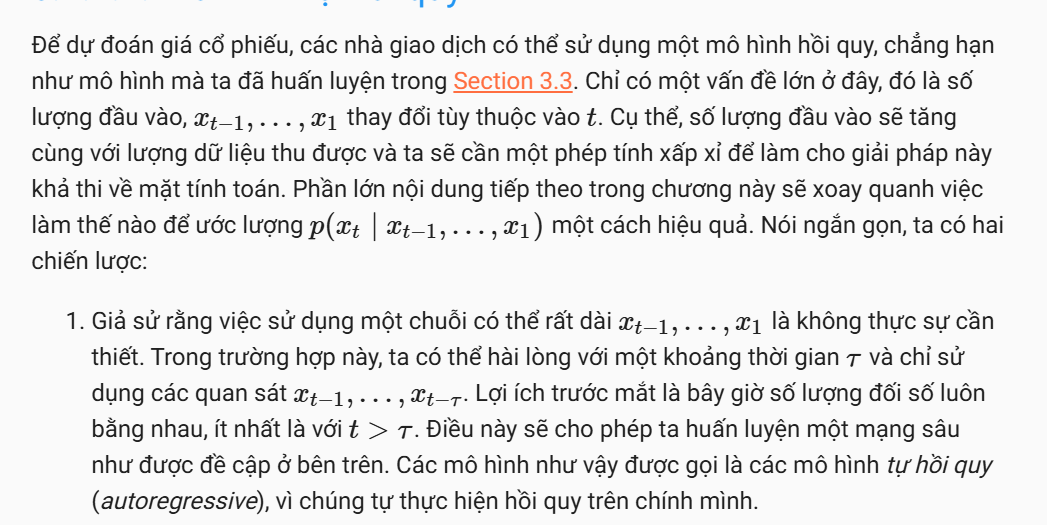

 ### (latent autoregressive model). LSTM và GRU là hai ví dụ cho kiểu mô hình này.

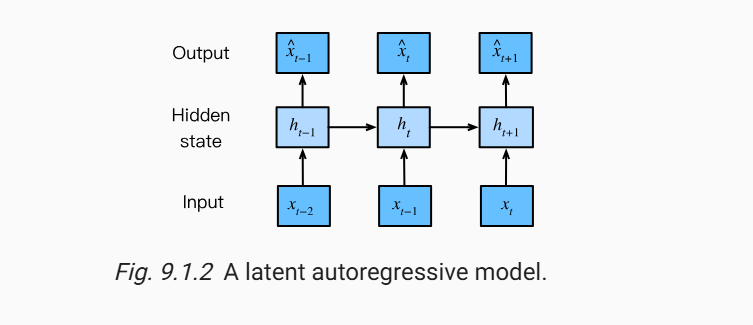

In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

## Sequence Models

**Mô hình chuỗi (Sequence Models)**

Đôi khi, đặc biệt khi làm việc với ngôn ngữ, chúng ta cần ước tính xác suất của cả một chuỗi. Đây là một nhiệm vụ phổ biến khi làm việc với chuỗi có các thành phần là các ký hiệu rời rạc, chẳng hạn như từ ngữ. Thông thường, các hàm ước tính này được gọi là mô hình chuỗi, và đối với dữ liệu ngôn ngữ tự nhiên, chúng được gọi là **mô hình ngôn ngữ** (language models). Lĩnh vực mô hình chuỗi đã được thúc đẩy rất nhiều bởi xử lý ngôn ngữ tự nhiên (NLP), đến mức chúng ta thường mô tả mô hình chuỗi là "mô hình ngôn ngữ", ngay cả khi làm việc với dữ liệu không liên quan đến ngôn ngữ.

**Mô hình ngôn ngữ** rất hữu ích vì nhiều lý do. Đôi khi chúng ta muốn đánh giá khả năng xảy ra của một câu. Ví dụ, có thể chúng ta muốn so sánh độ tự nhiên của hai đầu ra ứng viên được tạo ra bởi một hệ thống dịch máy hoặc hệ thống nhận dạng giọng nói. Nhưng mô hình ngôn ngữ không chỉ cho phép chúng ta đánh giá xác suất mà còn có khả năng lấy mẫu chuỗi và tối ưu hóa các chuỗi có khả năng xảy ra nhất.

Mặc dù mô hình ngôn ngữ có vẻ không phải là một bài toán tự hồi quy, chúng ta có thể chuyển đổi nó thành dự đoán tự hồi quy bằng cách phân tách mật độ xác suất chung của một chuỗi thành tích của các mật độ có điều kiện từ trái sang phải bằng cách áp dụng **quy tắc chuỗi xác suất**:

\[ P(x_1, \ldots, x_T) = P(x_1) \prod_{t=2}^{T} P(x_t | x_1, \ldots, x_{t-1}) \]

Nếu chúng ta làm việc với các tín hiệu rời rạc như từ ngữ, thì mô hình tự hồi quy phải là một bộ phân loại xác suất, đưa ra toàn bộ phân phối xác suất trên từ vựng cho từ sẽ xuất hiện tiếp theo, dựa trên ngữ cảnh trước đó.



### Mô hình Markov

Giả sử rằng chúng ta chỉ điều kiện hóa trên **n** bước thời gian trước đó, tức là chỉ xem xét \( x_{t-n}, \ldots, x_{t-1} \) thay vì toàn bộ lịch sử \( x_1, \ldots, x_{t-1} \). Khi có thể bỏ qua lịch sử ngoài **n** bước gần nhất mà không mất đi khả năng dự đoán, ta nói rằng chuỗi thỏa mãn điều kiện **Markov**, tức là tương lai chỉ phụ thuộc vào lịch sử gần đây.

- Nếu **n = 1**, chuỗi này được gọi là mô hình Markov bậc nhất (first-order Markov model).
- Nếu **n > 1**, nó được gọi là mô hình Markov bậc **n**.

Khi điều kiện Markov bậc nhất thỏa mãn, xác suất chung của chuỗi trở thành tích của các xác suất của mỗi từ dựa trên từ ngay trước nó:

\[ P(x_1, \ldots, x_T) = P(x_1) \prod_{t=2}^{T} P(x_t | x_{t-1}) \]

Dù rằng điều kiện Markov chỉ đúng một cách xấp xỉ trong văn bản thực tế, nhưng thường người ta sử dụng mô hình Markov vì các khó khăn tính toán và thống kê giảm đi nhiều khi sử dụng mô hình này.

### Thứ tự giải mã (The Order of Decoding)

Một câu hỏi đặt ra là tại sao chúng ta biểu diễn sự phân tách của một chuỗi văn bản từ trái sang phải? Trên thực tế, không có vấn đề gì nếu phân tách chuỗi theo hướng ngược lại, tức từ phải sang trái, và đây là một phân tách hợp lệ:

\[ P(x_1, \ldots, x_T) = P(x_T) \prod_{t=1}^{T-1} P(x_t | x_{t+1}, \ldots, x_T) \]

Tuy nhiên, có nhiều lý do khiến việc phân tách từ trái sang phải được ưu tiên hơn, đặc biệt đối với ngôn ngữ:

1. **Hướng tự nhiên**: Chúng ta đọc văn bản từ trái sang phải (đối với hầu hết ngôn ngữ) nên dự đoán theo thứ tự này dễ dàng hơn vì chúng ta đã quen với việc dự đoán các từ tiếp theo trong câu.
2. **Tính liên tục**: Bằng cách phân tách từ trái sang phải, chúng ta có thể gán xác suất cho các chuỗi có độ dài bất kỳ bằng cách nhân với xác suất có điều kiện của các từ bổ sung.
3. **Dự đoán tốt hơn**: Dự đoán từ liền kề dễ hơn so với dự đoán từ ở các vị trí bất kỳ khác. Ví dụ, trong các hệ thống có cấu trúc nhân quả, chúng ta tin rằng các sự kiện trong tương lai không thể ảnh hưởng đến quá khứ.

Do đó, việc phân tách chuỗi từ trái sang phải không chỉ tự nhiên mà còn giúp cải thiện khả năng dự đoán.



chúng ta có thể giảm mô hình hóa ngôn ngữ thành dự đoán tự hồi quy bằng cách phân tách mật độ khớp của một chuỗi [thành tích của mật độ có điều kiện theo kiểu từ trái sang phải bằng cách áp dụng quy tắc xác suất chuỗi như biểu thức bên dưới

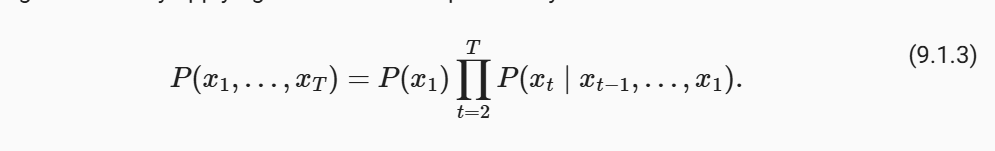

### Markov Model

Đối với Markov giới thiệu rút gọn quy tắt xác suất ngắn gọn

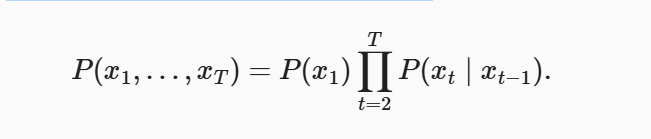

### The Order of Decoding

Đúng vậy! Việc giải thích xác suất có điều kiện \( p(x_{t+1} \mid x_t) \) thường đơn giản hơn so với \( p(x_t \mid x_{t+1}) \) bởi vì chúng ta có thể xem xét quá trình chuyển tiếp từ trạng thái hiện tại \( x_t \) đến trạng thái tiếp theo \( x_{t+1} \). Ví dụ, như trong nghiên cứu của [Hoyer et al., 2009], họ đã chỉ ra rằng trong nhiều trường hợp, chúng ta có thể mô hình hóa \( x_{t+1} = f(x_t) + \epsilon \), với \( \epsilon \) là nhiễu, điều này cho phép chúng ta dự đoán trạng thái tiếp theo dựa trên trạng thái hiện tại. Ngược lại, việc tìm ra trạng thái hiện tại từ trạng thái tiếp theo (\( p(x_t \mid x_{t+1}) \)) lại không đơn giản vì nó đòi hỏi chúng ta phải đảo ngược quá trình này, điều có thể không khả thi hoặc không rõ ràng.

Đây là một kết quả quan trọng vì trong nhiều ứng dụng thực tế, chúng ta quan tâm đến việc dự đoán chiều thuận (từ \( x_t \) đến \( x_{t+1} \)), chẳng hạn như dự đoán xu hướng, động thái thị trường, hoặc quá trình trong thời gian.`

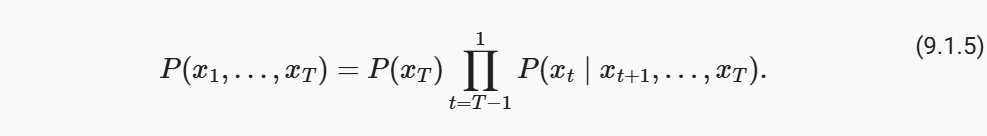

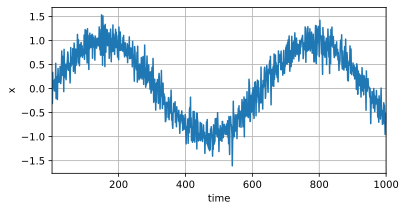

In [ ]:
class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2

data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [ ]:
@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]
    self.features = torch.stack(features, 1)
    self.labels = self.x[self.tau:].reshape((-1, 1))
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

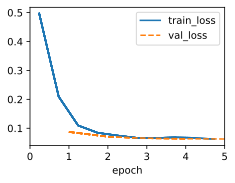

In [ ]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

## Exercise :

1. Incorporate more than the past four observations? How many do you really need?

64

với taus các quan sát trong quá khứ

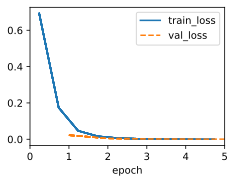

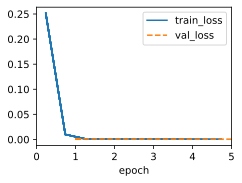

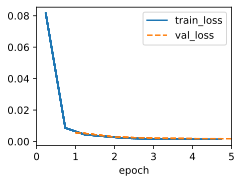

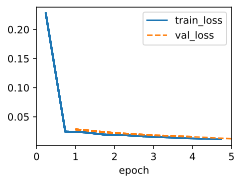

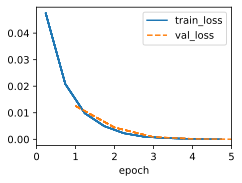

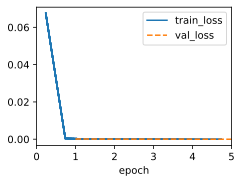

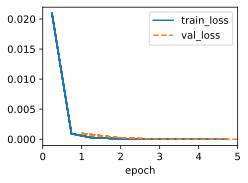

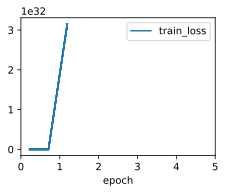

In [ ]:
taus = [4, 8, 16, 32, 64, 128, 256, 512]
tau_loss = []
for t in taus:
  data = Data(tau = t)
  model = d2l.LinearRegression(lr=0.01)
  trainer = d2l.Trainer(max_epochs=5)
  trainer.fit(model, data)
  onestep_preds = model(data.features[data.num_train:])
  tau_loss.append(model.loss(y_hat=onestep_preds, y=data.labels[data.num_train:]).item())



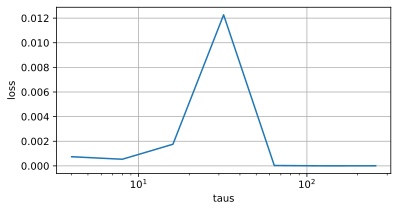

In [ ]:
d2l.plot(taus, tau_loss, 'taus', 'loss', xscale='log', figsize=(6, 3))

2. How many past observations would you need if there was no noise? [Bạn sẽ cần bao nhiêu quan sát trong quá khứ nếu không có tiếng ồn?

8

3. Thay đổi cấu trúc mạng nơ-ron và quan sát tác động của nó.

We can use weighted average of older observations while keeping the total number of features constant, while this does not improve accuracy, because the weighted average might lose some information. [Chúng ta có thể sử dụng trung bình có trọng số của các quan sát cũ hơn trong khi vẫn giữ tổng số đặc điểm không đổi, trong khi điều này không cải thiện độ chính xác vì trung bình có trọng số có thể làm mất một số thông tin.] x


AttributeError: 'Data' object has no attribute 'labels'

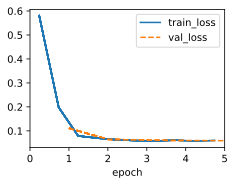

In [ ]:
class CorOldData(d2l.DataModule):
    def __init__(self, x, batch_size=16, T=1000, num_train=600, tau=4, randn=0.2):
        self.save_hyperparameters()
        self.time = torch.range(1, T, dtype=torch.float32)
        self.x = x

    def get_dataloader(self, train):
        features = [self.x[i:self.T-self.tau+i] for i in range(self.tau+1)]
        features = torch.stack(features, 1)
        features[:, -2] = (features[:, -2]+features[:, -1])/2
        self.features = features[:, :-1]
        self.labels = self.x[self.tau:].reshape((-1, 1))
        # print(self.features.shape,self.labels.shape)
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.features, self.labels], train, i)
org_data = Data()
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, org_data)
onestep_preds = model(org_data.features[org_data.num_train:])
model.loss(y_hat=onestep_preds, y=data.labels[org_data.num_train:]).item()

4. Thay đổi cấu trúc mạng nơ-ron và quan sát tác động của nó

In [ ]:
class MulMLPReg(d2l.LinearRegression):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        layers = [nn.Flatten()]
        for num in num_hiddens:
            layers.append(nn.Sequential(nn.LazyLinear(num),
                                        nn.ReLU(),
                                        # nn.LazyBatchNorm1d()
                                       ))
        layers.append(nn.LazyLinear(num_outputs))
        self.net = nn.Sequential(*layers)

    def forward(self, X):
        X = self.net[0](X)
        for blk in self.net[1:-1]:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)

        return self.net[-1](X)
model = MulMLPReg(lr=0.01,num_outputs=1, num_hiddens=[1]*4)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)
onestep_preds = model(data.features[data.num_train:])
model.loss(y_hat=onestep_preds, y=data.labels[data.num_train:]).item()

5. Hãy cho một ví dụ khi mô hình tự hồi quy tiềm ẩn có thể cần được dùng để nắm bắt động lực của dữ liệu.

Động lực của dữ liệu (data dynamics) đề cập đến các quy luật hoặc xu hướng mà dữ liệu thể hiện qua thời gian

# Converting raw text into sequences data

In [ ]:
!pip install d2l


In [ ]:
import collections
import re
import torch
from d2l import torch as d2l

Typical preprocessing pipelines execute the following steps:

    Load text as strings into memory.

    Split the strings into tokens (e.g., words or characters).

    Build a vocabulary dictionary to associate each vocabulary element with a numerical index.

    Convert the text into sequences of numerical indices

The content have two terms : tokens, sequences

    tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization

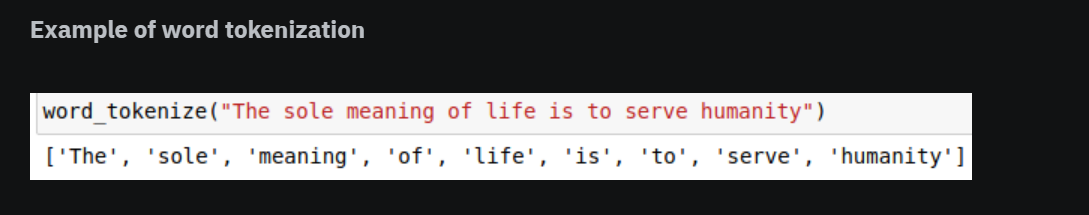

Example: Sentence: "Hello world!"
Word Tokens: ["Hello", "world", "!"]

Example: Sentence: "Hello"
Character Tokens: ["H", "e", "l", "l", "o"]

Example: Word: "unhappiness"
Subword Tokens: ["un", "##happy", "##ness"]
(Here, "##" indicates that the token is a continuation of a word.)

Convert the text into sequences of numerical indices.


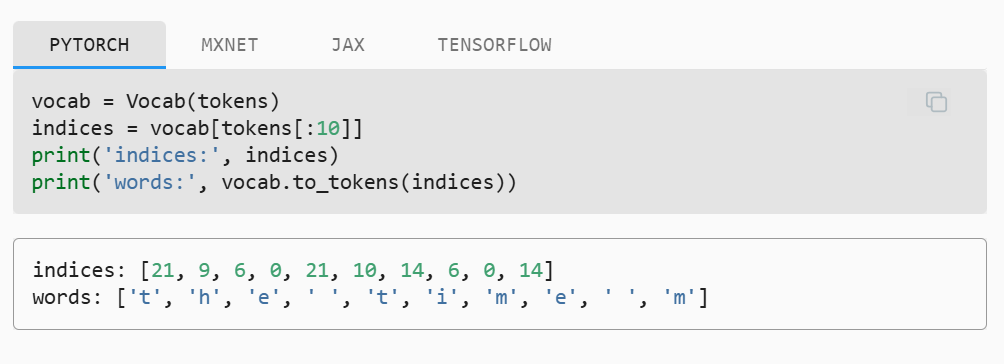

## Reading the dataset

In [ ]:
class TimeMachine(d2l.DataModule):
  """The Time Machine dataset."""
  def _download(self):
    fname = d2l.download(d2l.DATA_URL+ 'timemachine.txt', self.root,
                         '090b5e7e70c295757f55df93cb0a180b9691891a')
    # chỉ định thư mục gốc nơi các tệp sẽ được lưu trữ sau khi tải xuống. nếu self.root là "./data", thì tệp timemachine.txt sẽ được lưu trong thư mục data.
    # đảm bảo rằng tệp không bị thay đổi hoặc hỏng trong quá trình tải xuống
    print(d2l.DATA_URL)
    with open(fname) as f:
      return f.read()

data = TimeMachine()
raw_text = data._download()
raw_text[:50]

NameError: name 'd2l' is not defined

In [ ]:
@d2l.add_to_class(TimeMachine)
def _preprocess(self, text):
    return re.sub('[^A-Za-z]+', ' ', text).lower()
# conver word upper to lower, only keep in character
# Loại bỏ các ký tự không phải chữ cái (như số, ký tự đặc biệt, v.v.)
# Chuyển tất cả các chữ cái thành chữ thường, giúp tránh phân biệt chữ hoa và chữ thường khi xử lý văn bản.
text = data._preprocess(raw_text)
text[:50]

NameError: name 'd2l' is not defined

## Tokenization

What is the tekenization?

    [Tokenization là quá trình chia nhỏ một đoạn văn bản thành các đơn vị nhỏ hơn gọi là token. Mã thông báo có thể là từ, từ phụ hoặc thậm chí là các ký tự riêng lẻ, tùy thuộc vào cách chúng ta chọn thể hiện văn bản.]

why it used ?

    Tokenization là một bước quan trọng trong xử lý ngôn ngữ tự nhiên (NLP) giúp chuyển đổi văn bản thành dạng có thể xử lý bởi các mô hình học máy

In [ ]:
s = 'the time machine by h g wells i the time traveller'

print(list(s))

In [ ]:
@d2l.add_to_class(TimeMachine)  #@save
def _tokenize(self, text):
    return list(text)

tokens = data._tokenize(text)
','.join(tokens[:30])

## Vocabulary

Convert tokenization to sequences of numerical indices.

In [ ]:
class Vocab:
    def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
        # Flatten a 2D list if needed
      if tokens and isinstance(tokens[0], list):
        tokens = [token for line in tokens for token in line]
      # Count token frequencies
      counter = collections.Counter(tokens)
      self.token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                reverse=True)
        # The list of unique tokens

#self.idx_to_token: Danh sách các token đã được lọc và sắp xếp, bao gồm các token đặc biệt và các token có tần suất tối thiểu.
# self.token_to_idx: Từ điển ánh xạ mỗi token tới chỉ số của nó trong self.idx_to_token, giúp dễ dàng tra cứu chỉ số của một token trong quá trình huấn luyện mô hình"""

      self.idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [
          token for token, freq in self.token_freqs if freq >= min_freq])))
      self.token_to_idx = {token: idx
                            for idx, token in enumerate(self.idx_to_token)}
    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if hasattr(indices, '__len__') and len(indices) > 1:
            return [self.idx_to_token[int(index)] for index in indices]
        return self.idx_to_token[indices]

    @property
    def unk(self):  # Index for the unknown token
        return self.token_to_idx['<unk>']

In [ ]:
vocab = Vocab(tokens)
indices = vocab[tokens[:10]]
print('indices:', indices)
print('words:', vocab.to_tokens(indices))

indices: [21, 9, 6, 0, 21, 10, 14, 6, 0, 14]
words: ['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm']


In [ ]:
print(len(vocab))

4580


Character tương ứng với vị trí của nó trong bảng chữ cái alpha bet
với t : 21, i : 6

In [ ]:
@d2l.add_to_class(TimeMachine)
def build(self, raw_text, vocab=None):
    tokens = self._tokenize(self._preprocess(raw_text))
    if vocab is None: vocab = Vocab(tokens)
    corpus = [vocab[token] for token in tokens]
    return corpus, vocab

corpus, vocab = data.build(raw_text)
len(corpus), len(vocab)

(173428, 28)

In [ ]:
words = text.split()
vocab = Vocab(words)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

Phương thức trả về ba phần:

    Kho văn bản đã được mã hóa.
    Danh sách các chỉ số mã thông báo.
    Từ vựng của kho văn bản (tức là tập hợp các ký tự hoặc token).

 Articles like “the” and “a”, pronouns like “i” and “my”, and prepositions like “of”, “to”, and “in” occur often because they serve common syntactic roles. Such words that are common but not particularly descriptive are often called stop words

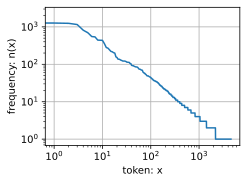

In [ ]:
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')

Rốt cuộc, chúng ta sẽ đánh giá quá cao tần suất của đuôi, còn được gọi là những từ không thường xuyên. Nhưng còn những cách kết hợp từ khác, chẳng hạn như hai từ liên tiếp (bigram), ba từ liên tiếp (trigram) và hơn thế nữa thì sao? Hãy xem liệu tần số bigram có hoạt động giống như tần số một từ (unigram) hay không.]

In [ ]:
bigram_tokens = ['--'.join(pair) for pair in zip(words[:-1], words[1:])]
bigram_vocab = Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[('of--the', 309),
 ('in--the', 169),
 ('i--had', 130),
 ('i--was', 112),
 ('and--the', 109),
 ('the--time', 102),
 ('it--was', 99),
 ('to--the', 85),
 ('as--i', 78),
 ('of--a', 73)]

In [ ]:
trigram_tokens = ['--'.join(triple) for triple in zip(
    words[:-2], words[1:-1], words[2:])]
trigram_vocab = Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[('the--time--traveller', 59),
 ('the--time--machine', 30),
 ('the--medical--man', 24),
 ('it--seemed--to', 16),
 ('it--was--a', 15),
 ('here--and--there', 15),
 ('seemed--to--me', 14),
 ('i--did--not', 14),
 ('i--saw--the', 13),
 ('i--began--to', 13)]

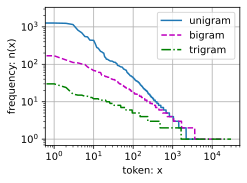

In [ ]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

Việc các từ bi-gram hay trigram, ngram có tần số xuất hiện thấp không đồng nghĩa chúng ko bị đánh giá thấp mà ngược lại

Đầu tiên, ngoài các từ unigram, các chuỗi từ dường như cũng tuân theo định luật Zipf, mặc dù có số mũ nhỏ hơn trong (9.2.1), tùy thuộc vào độ dài chuỗi. Thứ hai, số lượng n-gram riêng biệt không lớn. Điều này cho chúng ta hy vọng rằng có khá nhiều cấu trúc trong ngôn ngữ. Thứ ba, nhiều n-gram rất hiếm khi xảy ra. Điều này làm cho một số phương pháp nhất định không phù hợp với mô hình ngôn ngữ và thúc đẩy việc sử dụng các mô hình học sâu.
Các ứng dụng cải tiến hơn sẽ giải quyết vấn đề của n-gram

## Summary

Văn bản là một trong những dạng dữ liệu trình tự phổ biến nhất gặp phải trong học sâu. Các lựa chọn phổ biến cho những gì cấu thành mã thông báo là ký tự, từ và phần từ. Để xử lý trước văn bản, chúng tôi thường

    (i) chia văn bản thành các mã thông báo (split text into tokens);

    (ii) xây dựng vốn từ vựng để ánh xạ các chuỗi mã thông báo thành các chỉ số số; và (build a vocabulary to map token strings to numerical indices)

    (iii) chuyển đổi dữ liệu văn bản thành các chỉ mục mã thông báo để các mô hình thao tác.(convert text data into token indices for models to manipulate)
    
   Trong thực tế, tần suất của từ có xu hướng tuân theo định luật Zipf. Điều này đúng không chỉ với các từ riêng lẻ (unigram) mà còn đúng với n-gram

## Exercises

1. In the experiment of this section, tokenize text into words and vary the min_freq argument value of the Vocab instance. Qualitatively characterize how changes in min_freq impact the size of the resulting vocabulary. [Trong thử nghiệm của phần này, mã hóa văn bản thành các từ và thay đổi giá trị đối số min_freq của phiên bản Vocab. Mô tả một cách định tính mức độ ảnh hưởng của những thay đổi trong min_freq đến kích thước của từ vựng thu được

In [ ]:
vocab = Vocab(words,min_freq=1)
len(vocab)

4580

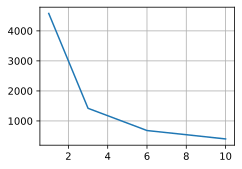

In [ ]:
min_freqs = [1, 3, 6, 10]
vocab_lens = []
for min_freq in min_freqs:
  words = text.split()
  vocab = Vocab(words,min_freq=min_freq)
  vocab_lens.append(len(vocab)) # Append the length of the current vocabulary to the list

d2l.plot(min_freqs, vocab_lens) # Plot the min_freqs against the vocab_lens


2. Estimate the exponent of Zipfian distribution for unigrams, bigrams, and trigrams in this corpus. [Ước tính số mũ của phân phối Zipfian cho unigram, bigram và bát quái trong kho văn bản này.]

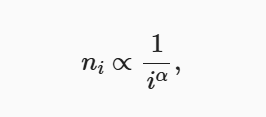

unigram with alpha = 1, bi alpha = 2,..

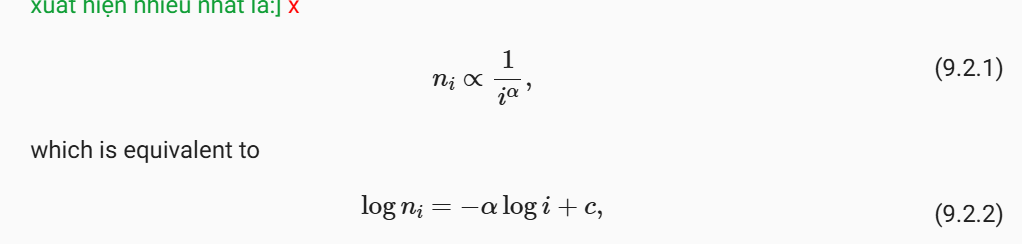

Giả sử bài toán liner regression với biểu thức trên với ni là tần số từ (y) và i (x : rank)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
class FreqData(d2l.SyntheticRegressionData):
    def __init__(self, X, y, num_train=1000, batch_size=32):
        self.save_hyperparameters()

def estimate_exp(words):
    vocab = Vocab(words)
    freqs = torch.log(torch.tensor([freq for w, freq in vocab.token_freqs])).reshape(-1,1)
    rank = torch.log(torch.range(1, len(freqs))).reshape(-1,1)
    data = FreqData(X=rank, y=freqs)
    model = d2l.LinearRegression(1)
    trainer = d2l.Trainer(max_epochs=5)
    trainer.fit(model, data)
    w = model.net.weight.item()
    plt.figure(figsize=(5, 3))
    plt.scatter(rank.detach().numpy(), freqs.detach().numpy(), label="Data")
    plt.plot(rank.detach().numpy(), model(rank).detach().numpy(), 'r-', label="Fitted Power Law")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.title(f"Estimated Exponent (s): {w:.2f}")
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Estimated Exponent (s): {w:.2f}")

In [ ]:
bigram_tokens = ['--'.join(pair) for pair in zip(words[:-1], words[1:])]
trigram_tokens = ['--'.join(pair) for pair in zip(words[:-2], words[1:], words[2:])]

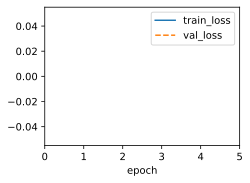

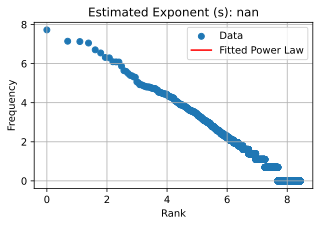

Estimated Exponent (s): nan


In [ ]:
words = text.split()

estimate_exp(words)


In [ ]:
estimate_exp(bigram_tokens)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
estimate_exp(trigram_tokens)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
estimate_exp(trigram_tokens)


3. Tìm một số nguồn dữ liệu khác (tải xuống tập dữ liệu máy học tiêu chuẩn, chọn một cuốn sách khác trong phạm vi công cộng, trích xuất một trang web, v.v.). Đối với mỗi loại, hãy mã hóa dữ liệu ở cả cấp độ từ và ký tự. Làm thế nào để so sánh kích thước từ vựng với kho dữ liệu The Time Machine ở các giá trị tương đương của min_freq. Ước tính số mũ của phân phối Zipfian tương ứng với phân phối unigram và bigram cho các tập đoàn này. Làm thế nào để chúng so sánh với các giá trị mà bạn quan sát được trong kho dữ liệu Cỗ máy thời gian?

d2l.dowload có thể mọi văn bản kể txt và pdf ....

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
class Review(d2l.DataModule):
    """Tải xuống tệp PDF."""

    def _download(self):
        fname = d2l.download("https://d2l.ai/chapter_recurrent-neural-networks/text-sequence.html#exercises")
        with open(fname, 'rb') as f:  # Mở tệp ở chế độ nhị phân
            return f.read()

data = Review()
raw_data = data._download()

# In ra 60 byte đầu tiên của dữ liệu nhị phân
print(raw_data[:60])


b'<!DOCTYPE html>\n\n<html lang="en">\n  <head>\n    <meta charset'


In [ ]:
@d2l.add_to_class(Review)
def _preprocess(self, text):
    return re.sub('[^A-Za-z]+', ' ', text).lower()

text = data._preprocess(raw_text)
text

TypeError: cannot use a string pattern on a bytes-like object

In [ ]:
@d2l.add_to_class(Review)
def _tokenize(self, text):
    return list(text)

tokens = data._tokenize(text)
','.join(tokens)

' ,d,o,c,t,y,p,e, ,h,t,m,l, ,h,t,m,l, ,l,a,n,g, ,e,n, ,d,a,t,a, ,c,o,n,t,e,n,t, ,r,o,o,t, ,h,e,a,d, ,m,e,t,a, ,c,h,a,r,s,e,t, ,u,t,f, ,m,e,t,a, ,n,a,m,e, ,v,i,e,w,p,o,r,t, ,c,o,n,t,e,n,t, ,w,i,d,t,h, ,d,e,v,i,c,e, ,w,i,d,t,h, ,i,n,i,t,i,a,l, ,s,c,a,l,e, ,t,i,t,l,e, ,s,c,i,k,i,t, ,l,e,a,r,n, ,m,a,c,h,i,n,e, ,l,e,a,r,n,i,n,g, ,i,n, ,p,y,t,h,o,n, ,s,c,i,k,i,t, ,l,e,a,r,n, ,d,o,c,u,m,e,n,t,a,t,i,o,n, ,t,i,t,l,e, ,s,c,r,i,p,t, ,d,a,t,a, ,c,f,a,s,y,n,c, ,f,a,l,s,e, ,d,o,c,u,m,e,n,t, ,d,o,c,u,m,e,n,t,e,l,e,m,e,n,t, ,d,a,t,a,s,e,t, ,m,o,d,e, ,l,o,c,a,l,s,t,o,r,a,g,e, ,g,e,t,i,t,e,m, ,m,o,d,e, ,d,o,c,u,m,e,n,t, ,d,o,c,u,m,e,n,t,e,l,e,m,e,n,t, ,d,a,t,a,s,e,t, ,t,h,e,m,e, ,l,o,c,a,l,s,t,o,r,a,g,e, ,g,e,t,i,t,e,m, ,t,h,e,m,e, ,s,c,r,i,p,t, ,l,o,a,d,e,d, ,b,e,f,o,r,e, ,o,t,h,e,r, ,s,p,h,i,n,x, ,a,s,s,e,t,s, ,l,i,n,k, ,h,r,e,f, ,s,t,a,t,i,c, ,s,t,y,l,e,s, ,t,h,e,m,e, ,c,s,s, ,d,i,g,e,s,t, ,e,e, ,c,f, ,b, ,e, ,d, ,r,e,l, ,s,t,y,l,e,s,h,e,e,t, ,l,i,n,k, ,h,r,e,f, ,s,t,a,t,i,c, ,s,t,y,l,e,s, ,b,o,o,t,s

In [ ]:
words = text.split()
vocab = Vocab(words)
vocab.token_freqs

[('class', 240),
 ('a', 234),
 ('div', 168),
 ('href', 138),
 ('nav', 136),
 ('li', 126),
 ('html', 98),
 ('item', 81),
 ('strong', 80),
 ('sk', 79),
 ('link', 66),
 ('scikit', 53),
 ('learn', 53),
 ('script', 51),
 ('button', 48),
 ('static', 47),
 ('btn', 40),
 ('header', 40),
 ('fa', 39),
 ('pst', 39),
 ('title', 38),
 ('src', 38),
 ('navbar', 36),
 ('img', 36),
 ('data', 35),
 ('version', 33),
 ('css', 31),
 ('align', 31),
 ('v', 30),
 ('card', 30),
 ('p', 30),
 ('h', 29),
 ('rel', 28),
 ('https', 28),
 ('aria', 28),
 ('span', 28),
 ('d', 27),
 ('i', 26),
 ('internal', 26),
 ('dropdown', 25),
 ('modules', 25),
 ('search', 24),
 ('container', 24),
 ('auto', 24),
 ('type', 23),
 ('png', 23),
 ('examples', 23),
 ('label', 22),
 ('bs', 20),
 ('bd', 19),
 ('switcher', 19),
 ('and', 19),
 ('text', 18),
 ('js', 18),
 ('md', 18),
 ('theme', 17),
 ('stylesheet', 17),
 ('name', 16),
 ('org', 16),
 ('toggle', 16),
 ('ul', 16),
 ('landing', 16),
 ('id', 15),
 ('sidebar', 15),
 ('b', 14),
 ('e'

#  Language Models

![image.png](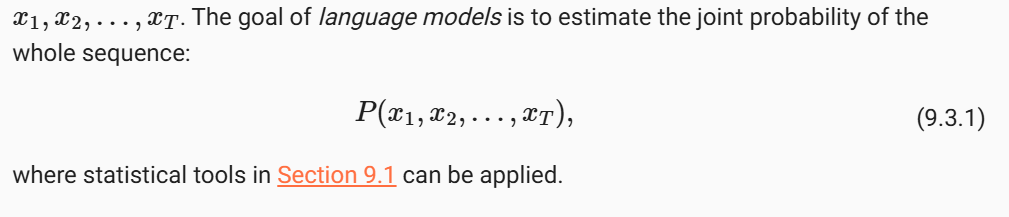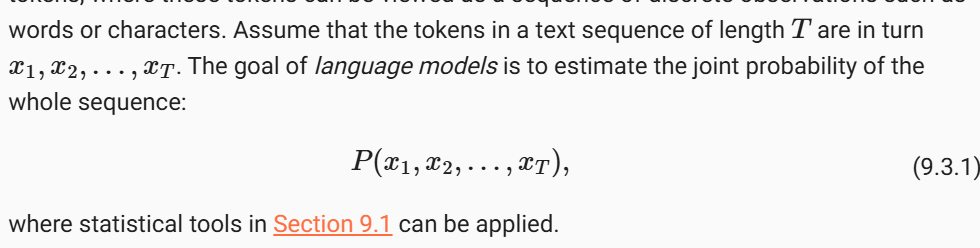)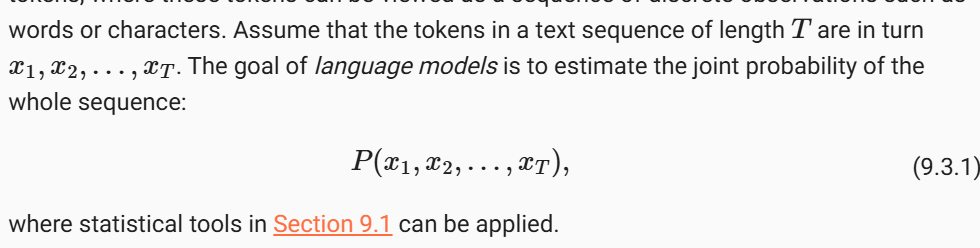

chúng có thể tìm ra từ xt ~ P(xt|xt-1,xt-2,..x1)

## Learning Language Models

Learning Language Models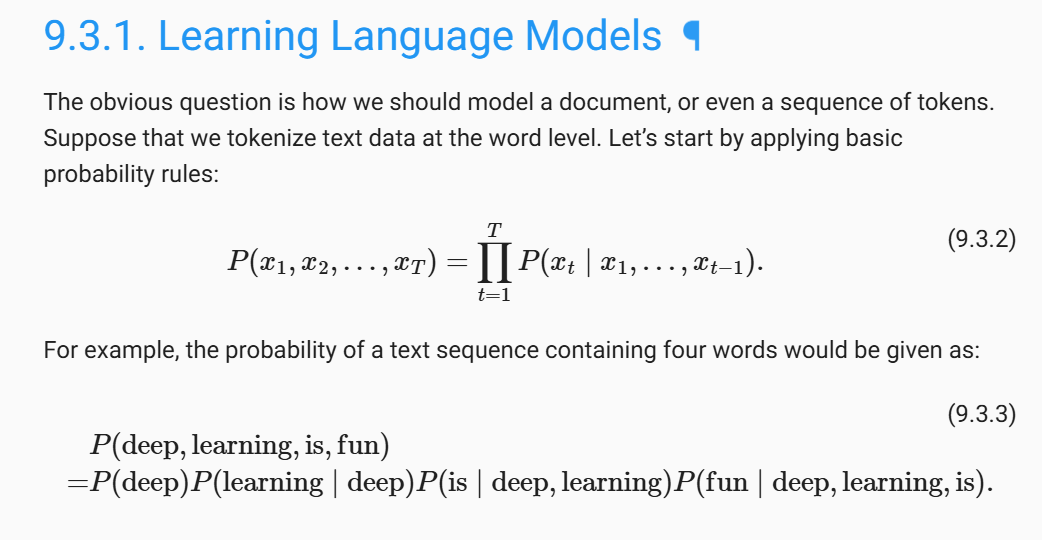

trên cho thấy một mô hình learning language model hoạt động và dự đoán

### Mô hình Markov và  n-grams

Như đã tìm hiểu bài trước uni gram và bi gram hay tri gram đóng vai trò khác nhau trong việc dự đoán hay xác suất chữ khác nhâu nên chúng không thể cùng một công cụ ước tính vì vậy:

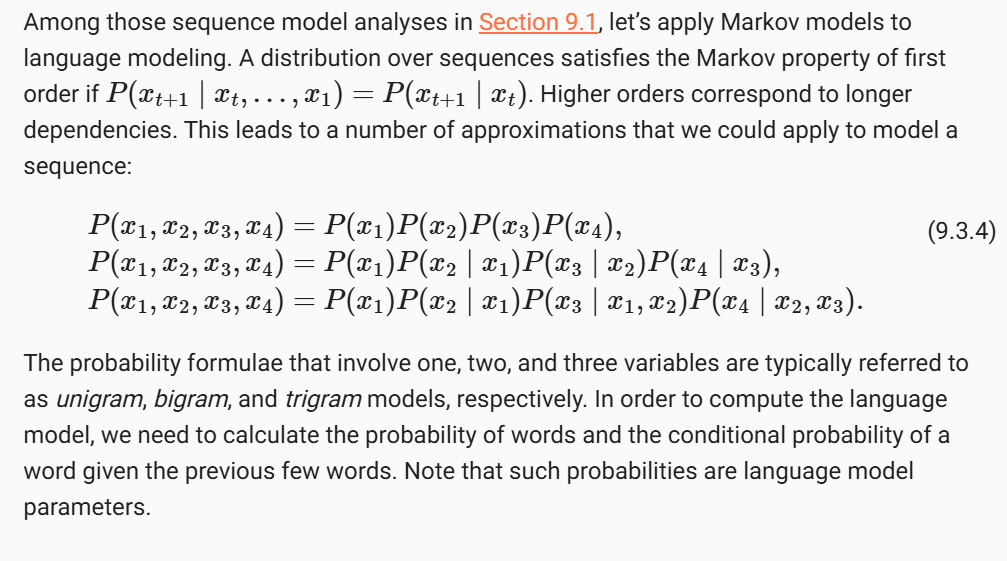

phương trình 1 tương ứng với unigram 1 biến, bigram tương ứng với bigram 2 biến và cuối cùng là trigram

### Word Frequency

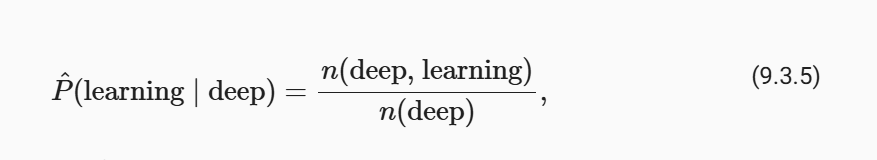

 Ví dụ: ước tính P(deep) có thể được tính bằng xác suất của bất kỳ câu nào bắt đầu bằng từ “sâu”. Một cách tiếp cận kém chính xác hơn một chút là đếm tất cả các lần xuất hiện của từ “sâu” và chia nó cho tổng số từ trong kho ngữ liệu. Điều này hoạt động khá tốt, đặc biệt đối với những từ thường xuyên. Tiếp tục, chúng ta có thể cố gắng ước tính

Ở đây  n(w)
  và  n(w,w′)
  lần lượt là số lần xuất hiện của các từ đơn và cặp từ ghép. Đáng tiếc là việc ước tính xác suất của một cặp từ thường khó khăn hơn, bởi vì sự xuất hiện của cặp từ “Statistics is” hiếm khi xảy ra hơn. Đặc biệt, với các cụm từ ít đi cùng nhau, rất khó tìm đủ số lần xuất hiện để ước tính chính xác. Mọi thứ thậm chí sẽ khó hơn đối với các cụm ba từ trở lên. Sẽ có nhiều cụm ba từ hợp lý mà hầu như không hề xuất hiện trong tập dữ liệu. Trừ khi có giải pháp để đánh trọng số khác không cho các tổ hợp từ đó, nếu không sẽ không thể sử dụng chúng trong một mô hình ngôn ngữ. Nếu kích thước tập dữ liệu nhỏ hoặc nếu các từ rất hiếm, chúng ta thậm chí có thể không tìm thấy nổi một lần xuất hiện của các tổ hợp từ đó.


  khắc phục **bold text** Một kỹ thuật phổ biến là làm mượt Laplace (Laplace smoothing). Chúng ta đã biết kỹ thuật này khi thảo luận về Naive Bayes trong Section 18.9, với giải pháp là cộng thêm một hằng số nhỏ vào tất cả các số đếm như sau

### Laplace Smoothing

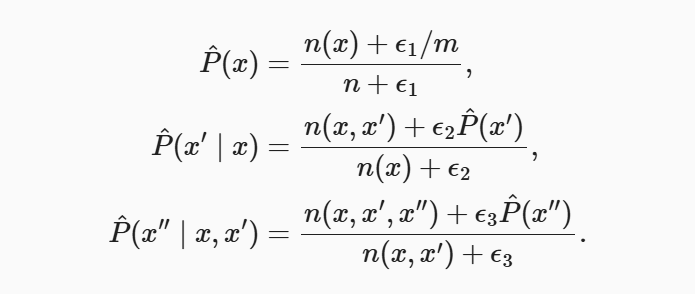

Laplace smoothing là một kỹ thuật được sử dụng trong các mô hình ngôn ngữ để tránh xác suất bằng không bằng cách cộng thêm một hằng số nhỏ vào các số đếm. Tuy nhiên, mô hình này gặp phải một số hạn chế như:

Lưu trữ số đếm: Cần lưu trữ tất cả các số đếm, điều này không khả thi trong các mô hình lớn.

Thiếu ý nghĩa ngữ cảnh: Các mô hình này không xét đến ý nghĩa của các từ, chẳng hạn như từ "cat" và "feline" nên xuất hiện trong các ngữ cảnh tương tự.

Chuỗi từ dài: Các chuỗi từ dài gần như luôn mới lạ, làm cho việc dựa vào tần số của các chuỗi từ đã thấy trở nên kém hiệu quả.

## Perplexity

“It is raining outside”

“It is raining banana tree”

“It is raining piouw;kcj pwepoiut”

Để đánh giá chất lượng của một mô hình ngôn ngữ, ta có thể xem xét khả năng dự đoán các từ tiếp theo trong một câu. Ví dụ, với câu "It is raining", một mô hình tốt sẽ dự đoán được các từ hợp lý như "outside" (Ví dụ 1). Một mô hình kém hơn có thể đưa ra các từ vô nghĩa hoặc ít liên quan (Ví dụ 2 và 3).

Để đo lường chất lượng mô hình, ta có thể tính xác suất của chuỗi từ. Tuy nhiên, xác suất này khó so sánh trực tiếp do các chuỗi ngắn thường có xác suất cao hơn. Thay vào đó, lý thuyết thông tin cung cấp các công cụ như entropy, surprisal, và cross-entropy để đánh giá chất lượng mô hình. Đo lường chất lượng bằng cách tính toán cross-entropy loss trung bình trên tất cả các token trong một chuỗi là cách tiếp cận phù hợp, vì nó cho thấy mô hình có thể dự đoán các token tiếp theo chính xác đến mức nào

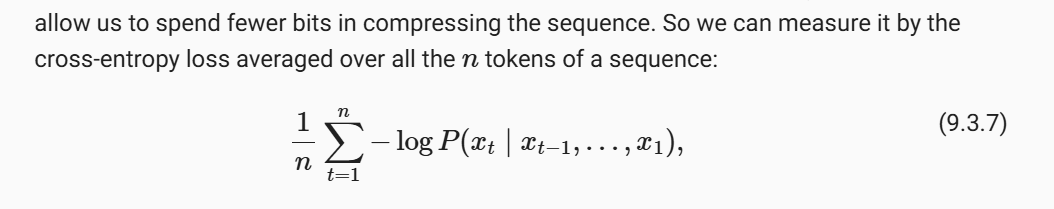

Để so sánh các mô hình trên các văn bản có độ dài khác nhau, người ta sử dụng **perplexity** (tính bằng công thức là exponential của cross-entropy). Perplexity thể hiện số lượng lựa chọn thực tế khi chọn token tiếp theo

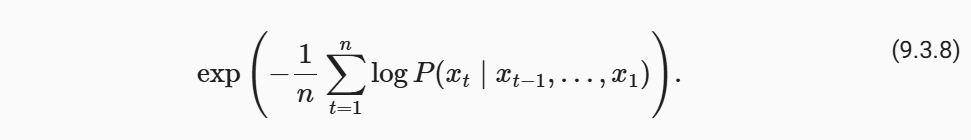



**Perplexity** là nghịch đảo của trung bình hình học của số lựa chọn thực tế khi chọn token tiếp theo. Các trường hợp điển hình:

1. **Trường hợp tốt nhất**: Mô hình dự đoán xác suất của token mục tiêu chính xác là 1, lúc này perplexity của mô hình là 1.
2. **Trường hợp tệ nhất**: Mô hình luôn dự đoán xác suất của token mục tiêu là 0, khiến perplexity tiến tới vô cực.
3. **Trường hợp cơ bản**: nếu mô hình dự đoán phân phối đều cho tất cả các token trong từ vựng, perplexity sẽ bằng số lượng token duy nhất trong từ vựng. Đây là giới hạn trên mà bất kỳ mô hình nào cũng phải vượt qua để có giá trị.


  ## Partitioning Sequences [Trình tự phân vùng]

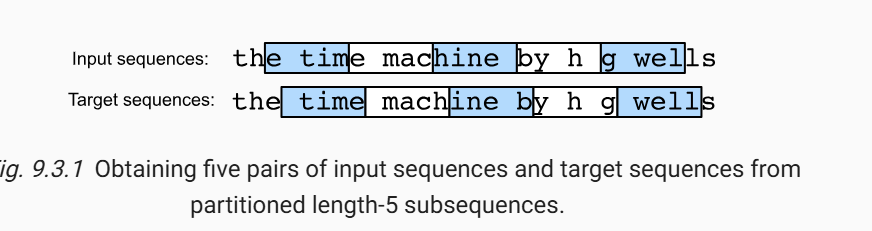

hình trên d = 2, và n tokens = 5

Nội dung hình ảnh bạn đã cung cấp được dịch như sau:

---

Chúng ta sẽ thiết kế các mô hình ngôn ngữ sử dụng mạng nơ-ron và sử dụng perplexity để đánh giá mức độ tốt của mô hình trong việc dự đoán từ tiếp theo dựa trên tập hợp các token hiện tại trong các chuỗi văn bản. Trước khi giới thiệu mô hình, hãy giả sử rằng mô hình xử lý một minibatch các chuỗi có độ dài xác định trước cùng một lúc. Bây giờ câu hỏi đặt ra là làm thế nào để đọc các minibatch của các chuỗi đầu vào và chuỗi mục tiêu một cách ngẫu nhiên.

Giả sử rằng tập dữ liệu có dạng một chuỗi các chỉ số token \( T \) trong văn bản. Chúng ta sẽ chia nó thành các chuỗi con, mỗi chuỗi con có \( n \) token (các bước thời gian). Để lặp qua (hầu như) tất cả các token của toàn bộ tập dữ liệu cho mỗi epoch và thu được tất cả các chuỗi con có độ dài \( n \), chúng ta có thể giới thiệu tính ngẫu nhiên. Cụ thể hơn, vào đầu mỗi epoch, bỏ qua \( d \) token đầu tiên, trong đó \( d \) được lấy ngẫu nhiên từ khoảng [0, n). Phần còn lại của chuỗi sau đó được chia thành \( m = \lfloor \frac{(T - d)}{n} \rfloor \) chuỗi con. Gọi \( \mathbf{x}_t = [x_t, \dots, x_{t+n-1}] \) là chuỗi con có độ dài \( n \) bắt đầu từ token \( x_t \) tại thời điểm \( t \). Các chuỗi con được phân chia này là \( \mathbf{x}_d, \mathbf{x}_{d+n}, \dots, \mathbf{x}_{d+n(m-1)} \). Mỗi chuỗi con sẽ được sử dụng làm chuỗi đầu vào cho mô hình ngôn ngữ.

Đối với mô hình ngôn ngữ, mục tiêu là dự đoán từ tiếp theo dựa trên các token mà chúng ta đã thấy cho đến nay; do đó các mục tiêu (nhãn) là chuỗi ban đầu, được dịch chuyển một token. Chuỗi mục tiêu cho bất kỳ chuỗi đầu vào \( \mathbf{x}_t \) là \( \mathbf{x}_{t+1} \) với độ dài \( n \).

**Hình 9.3.1:** Thu được năm cặp chuỗi đầu vào và chuỗi mục tiêu từ các chuỗi con có độ dài 5.

**Input sequences:** the time machine by h g well  
**Target sequences:** time machine by h g wells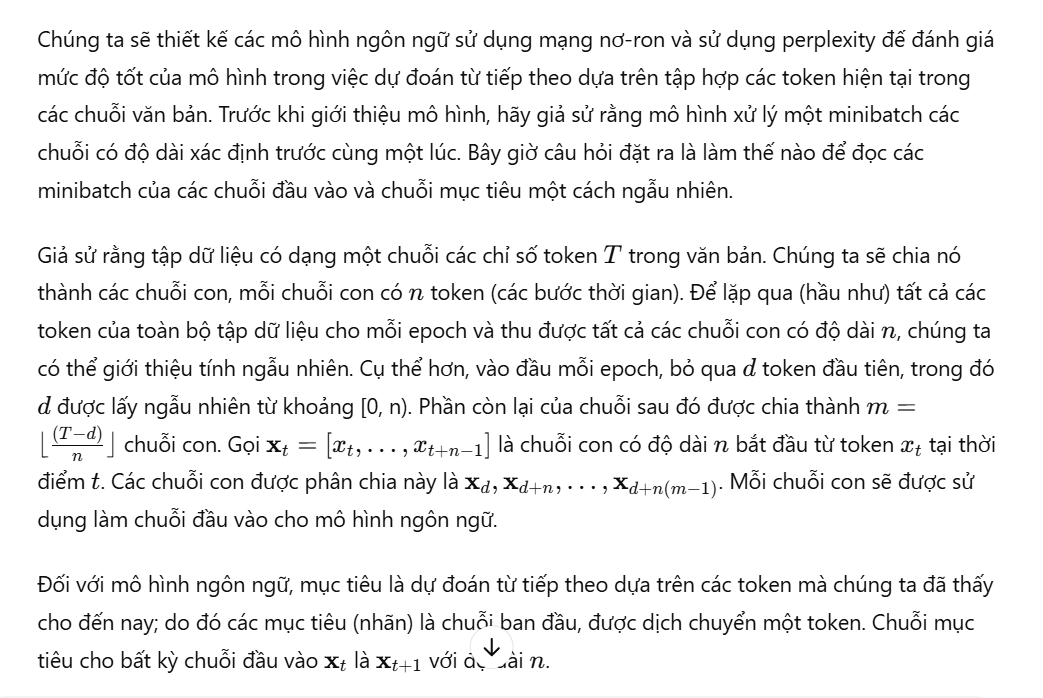

In [ ]:
@d2l.add_to_class(d2l.TimeMachine)
def __init__(self, batch_size, num_steps, num_train=10000, num_val=5000):
    super(d2l.TimeMachine, self).__init__()
    self.save_hyperparameters()
    corpus, self.vocab = self.build(self._download())
    array = torch.tensor([corpus[i:i+num_steps+1]
                        for i in range(len(corpus)-num_steps)])
    self.X, self.Y = array[:,:-1], array[:,1:]

Để đào tạo các mô hình ngôn ngữ, chúng tôi sẽ lấy mẫu ngẫu nhiên các cặp chuỗi đầu vào và chuỗi mục tiêu trong các lô nhỏ. Trình tải dữ liệu sau đây mỗi lần tạo ngẫu nhiên một minibatch từ tập dữ liệu. Đối số batch_size chỉ định số lượng mẫu chuỗi con trong mỗi minibatch và num_steps là độ dài chuỗi con tính bằng mã thông báo

In [ ]:
@d2l.add_to_class(d2l.TimeMachine)
def get_dataloader(self, train):
    idx = slice(0, self.num_train) if train else slice(
        self.num_train, self.num_train + self.num_val)
    return self.get_tensorloader([self.X, self.Y], train, idx)

In [ ]:
data = d2l.TimeMachine(batch_size=2, num_steps=10)
for X, Y in data.train_dataloader():
    print('X:', X, '\nY:', Y)
    break

## Exercises

1. Mô hình 4 gam cần lưu trữ tần số của từng từ và tần số của từng chuỗi 4 từ trong tập dữ liệu huấn luyện. Giả sử rằng mỗi từ được biểu thị bằng một số nguyên, tần số của từ có thể được lưu trữ trong bảng băm có kích thước 100.000. Tần số chuỗi bốn từ có thể được lưu trữ trong bảng băm có kích thước 100.000^4, tức là 10^20. Tuy nhiên, điều này rất kém hiệu quả và không thực tế vì hầu hết các chuỗi bốn từ sẽ không bao giờ xuất hiện trong tập dữ liệu huấn luyện. Do đó, cách tốt hơn để lưu trữ tần suất chuỗi bốn từ là sử dụng cấu trúc dữ liệu thưa thớt, chẳng hạn như cây trie hoặc cây hậu tố, chỉ lưu trữ các chuỗi thực sự xuất hiện trong tập dữ liệu. Điều này sẽ làm giảm đáng kể độ phức tạp của không gian.

5. If we want a sequence example to be a complete sentence, what kind of problem does this introduce in minibatch sampling? How can we fix it? [Nếu chúng ta muốn một ví dụ về trình tự là một câu hoàn chỉnh, điều này sẽ gây ra vấn đề gì khi lấy mẫu minibatch? Làm thế nào chúng ta có thể sửa nó?] x
Requiring that each sequence example in a minibatch be a complete sentence can introduce challenges in minibatch sampling, particularly when dealing with text data. The primary challenge is that sentences typically vary in length, and ensuring that each minibatch contains only complete sentences may lead to inefficiency and underutilization of data. Here are some issues and potential solutions: [Việc yêu cầu mỗi mẫu trình tự trong một lô nhỏ phải là một câu hoàn chỉnh có thể gây ra những thách thức trong việc lấy mẫu lô nhỏ, đặc biệt là khi xử lý dữ liệu văn bản. Thách thức chính là các câu thường có độ dài khác nhau và việc đảm bảo rằng mỗi lô nhỏ chỉ chứa các câu hoàn chỉnh có thể dẫn đến sự kém hiệu quả và sử dụng không đúng mức dữ liệu. Dưới đây là một số vấn đề và giải pháp tiềm năng:]

Padding: Use padding to ensure that all sentences in a minibatch have the same length. You can pad shorter sentences with a special token (e.g., <PAD>) to match the length of the longest sentence in the minibatch. Padding allows you to efficiently batch sequences and utilize GPU resources effectively.

# Recurrent Neural Network

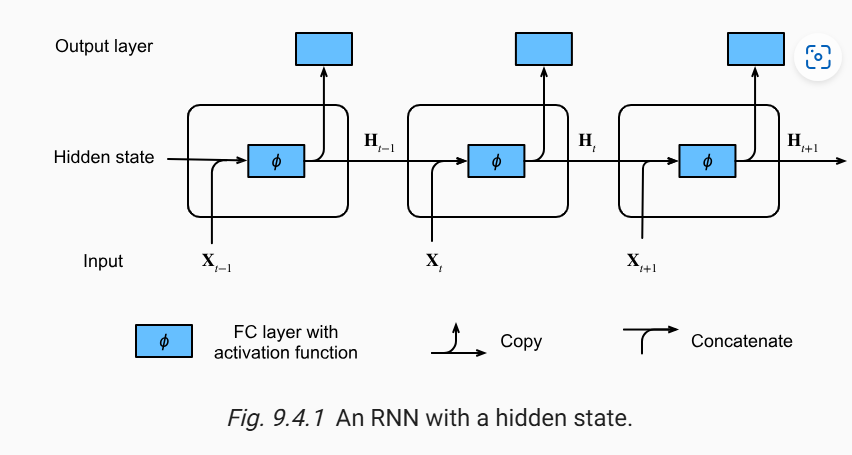

RNN sử dụng một latent variable model` (với ht latent variable hay hidden state)

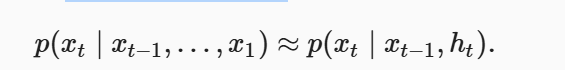

với module markov được xắp xỉ bằng như trên

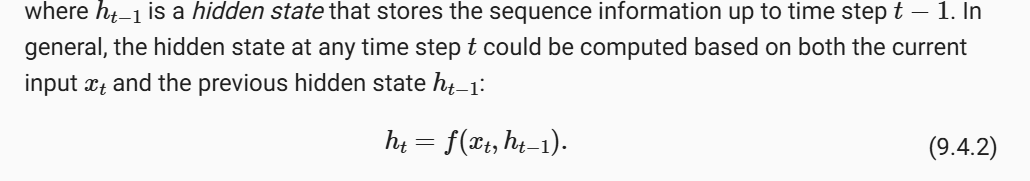

Ở Neural Network chúng ta sử dụng hidden layer, và đây chúng ta sử dụng hidden state chúng hoàn toàn khác nhau nên trách nhằm lẫn

## Neural Networks without Hidden States

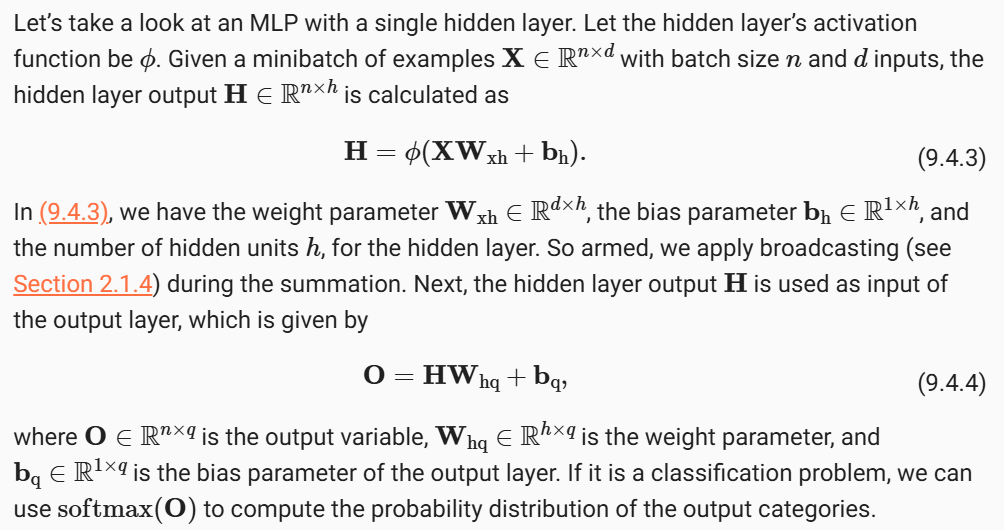

## Recurrent Neural Networks with Hidden States

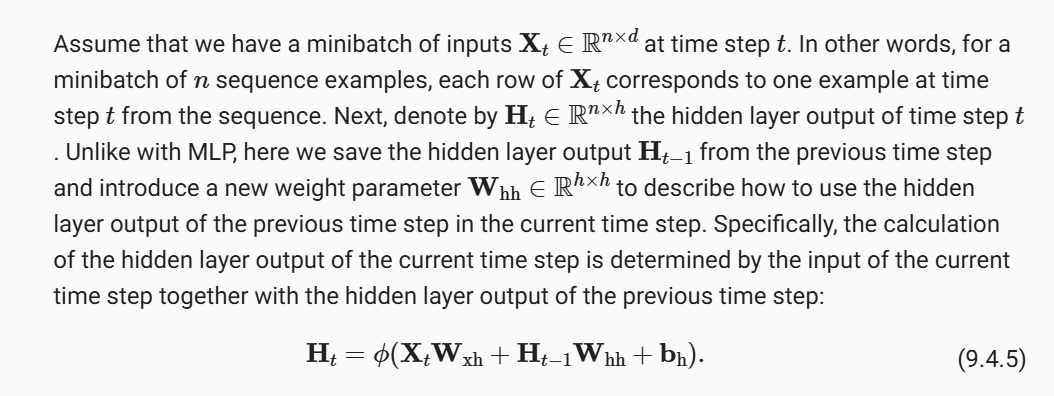

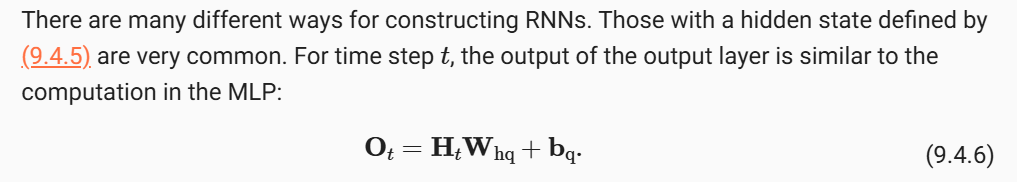

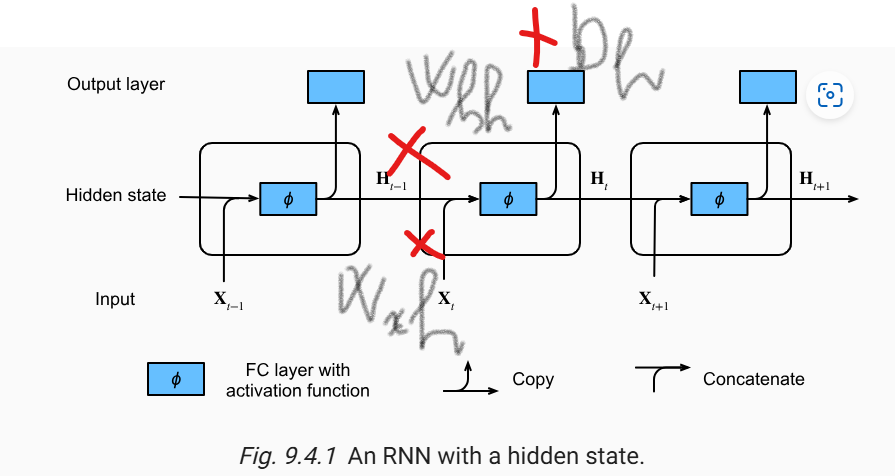

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 643.2 kB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 2.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Un

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
X, W_xh = torch.randn(3,1), torch.randn(1,4)
H, W_hh = torch.randn(3,4), torch.randn(4,4)

In [ ]:
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

tensor([[-1.0309, -3.2610,  1.6404, -1.2026],
        [ 2.8732, -1.0566,  2.6725, -4.6989],
        [ 2.2288, -0.9059, -2.8830, -0.5035]])

In [ ]:
 torch.cat((W_xh, W_hh))

tensor([[ 1.5257, -0.7182, -0.1583, -1.0789],
        [-1.0357, -0.8131,  0.9628,  0.0521],
        [ 0.6273,  0.5581, -1.5173,  1.2674],
        [-0.5607, -1.4539,  1.4249, -0.2606],
        [-0.0433,  1.2492,  1.7333, -0.3997]])

In [ ]:
torch.cat((X, H), 1)

tensor([[ 0.2185,  0.3142, -0.8017,  1.0132, -0.7429],
        [ 2.4706,  0.2178, -1.4734, -0.5125,  0.7781],
        [ 0.5017, -1.6286, -0.1964,  0.2639, -1.1018]])

In [ ]:
torch.matmul  (torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[-1.0309, -3.2610,  1.6404, -1.2026],
        [ 2.8732, -1.0566,  2.6725, -4.6989],
        [ 2.2288, -0.9059, -2.8830, -0.5035]])

## RNN-Based Character-Level Language Models

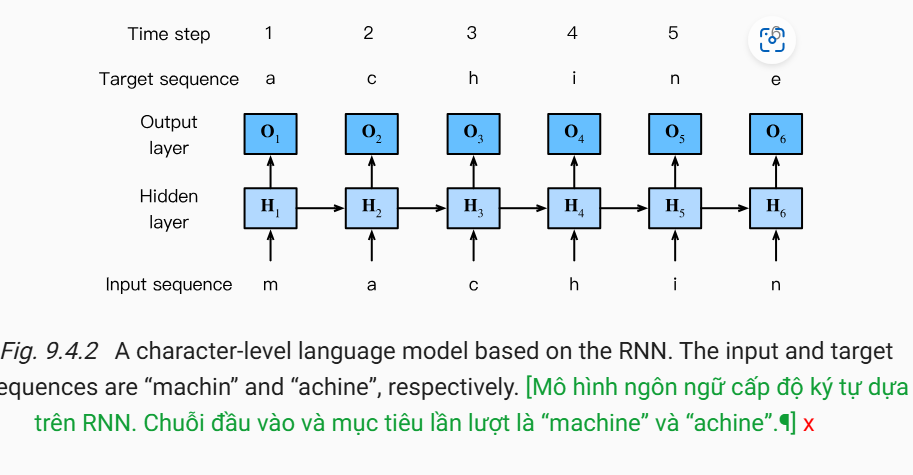

## Exercises

1. If we use an RNN to predict the next character in a text sequence, what is the required dimension for any output? [Nếu chúng ta sử dụng RNN để dự đoán ký tự tiếp theo trong chuỗi văn bản thì kích thước bắt buộc cho bất kỳ đầu ra nào là bao nhiêu?] x

2. Why can RNNs express the conditional probability of a token at some time step based on all the previous tokens in the text sequence? [Tại sao RNN có thể biểu thị xác suất có điều kiện của mã thông báo tại một bước thời gian nào đó dựa trên tất cả các mã thông báo trước đó trong chuỗi văn bản?] x

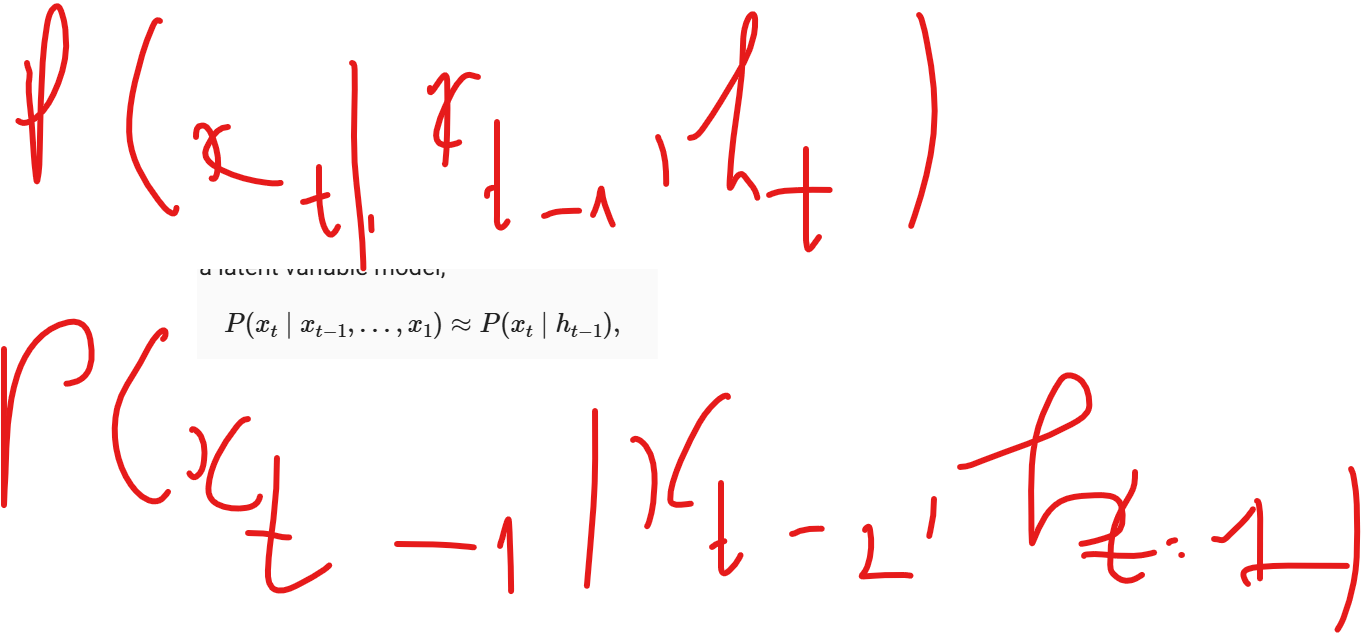
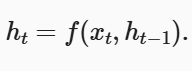
3. What happens to the gradient if you backpropagate through a long sequence? [Điều gì xảy ra với gradient nếu bạn truyền ngược qua một chuỗi dài?] x

Gradient Vashing
4. What are some of the problems associated with the language model described in this section? [Một số vấn đề liên quan đến mô hình ngôn ngữ được mô tả trong phần này là gì?] x

Gradient Vashing, padding, and chưa thể hiện về dự đoán từ

# Recurrent Neural Network Implementation from Scratch

In [ ]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## RNN Model

In [ ]:
class RNNScratch(d2l.Module):
    """The RNN model implemented from scratch."""
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W_xh = nn.Parameter(
            torch.randn(num_inputs, num_hiddens) * sigma)
        self.W_hh = nn.Parameter(
            torch.randn(num_hiddens, num_hiddens) * sigma)
        self.b_h = nn.Parameter(torch.zeros(num_hiddens))

In [ ]:
@d2l.add_to_class(RNNScratch)
def forward(self, inputs, state=None):
    if state is None:
        # Initial state with shape: (batch_size, num_hiddens)
        state = torch.zeros((inputs.shape[1], self.num_hiddens),
                          device=inputs.device)
    else:
        state, = state
    outputs = []
    for X in inputs:  # Shape of inputs: (num_steps, batch_size, num_inputs)
        state = torch.tanh(torch.matmul(X, self.W_xh) +
                         torch.matmul(state, self.W_hh) + self.b_h)
        outputs.append(state)
    return outputs, state

In [ ]:
batch_size, num_inputs, num_hiddens, num_steps = 2, 16, 32, 100
rnn = RNNScratch(num_inputs, num_hiddens)
X = torch.ones((num_steps, batch_size, num_inputs))
outputs, state = rnn(X)

In [ ]:
def check_len(a, n):
    """Check the length of a list."""
    assert len(a) == n, f'list\'s length {len(a)} != expected length {n}'

def check_shape(a, shape):
    """Check the shape of a tensor."""
    assert a.shape == shape, \
            f'tensor\'s shape {a.shape} != expected shape {shape}'

check_len(outputs, num_steps)
check_shape(outputs[0], (batch_size, num_hiddens))
check_shape(state, (batch_size, num_hiddens))

## RNN-Based Language Model

In [ ]:
class RNNLMScratch(d2l.Classifier):
    """The RNN-based language model implemented from scratch."""
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)

### One-Hot Encoding

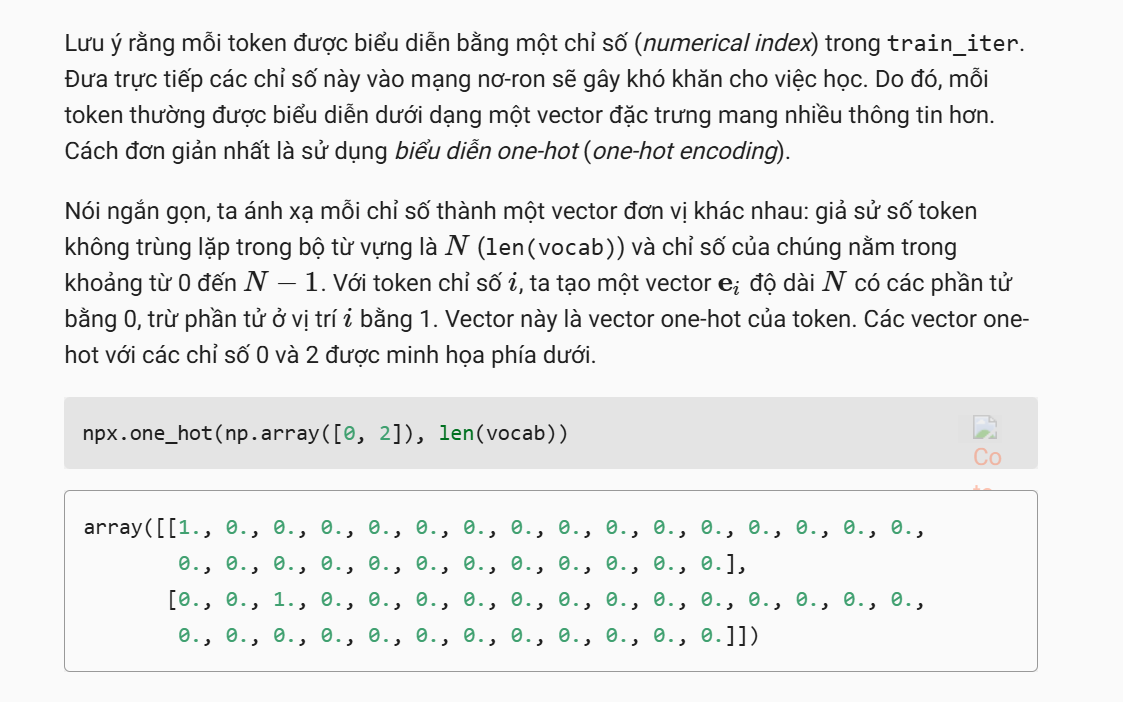

Tức là chúng chúng ta có một từ their ở vị trí 45, và nó được biễu diễn là [45]
nhưng đều này khó để mạng nơ ron hiểu được, vì vậy chúng cần chuyển nó thầnh vector one hot (vector ei), ở their vị trí 45 tức là vector ei có dạng
[000000..1...0] ví vị trí 45 bằng 1 và tất cả 0 với chiều dài là của vocab

In [ ]:
F.one_hot(torch.tensor([0, 2]), 5)

tensor([[1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]])

In [ ]:
@d2l.add_to_class(RNNLMScratch)
def one_hot(self, X):
    # Output shape: (num_steps, batch_size, vocab_size)
    return F.one_hot(X.T, self.vocab_size).type(torch.float32)

###  Transforming RNN Outputs

In [ ]:
class RNNLMScratch(d2l.Classifier):
    """The RNN-based language model implemented from scratch with learnable embeddings."""
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()
        # Thêm lớp nhúng
        self.embedding = nn.Embedding(vocab_size, rnn.num_inputs)
        print(rnn.num_inputs)

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)

# Bỏ hàm one_hot
# @d2l.add_to_class(RNNLMScratch)
# def one_hot(self, X):
#     # Output shape: (num_steps, batch_size, vocab_size)
#     return F.one_hot(X.T, self.vocab_size).type(torch.float32)
@d2l.add_to_class(RNNLMScratch)
def output_layer(self, rnn_outputs):
    outputs = [torch.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
    return torch.stack(outputs, 1)
@d2l.add_to_class(RNNLMScratch)
def forward(self, X, state=None):
    # Sử dụng lớp nhúng để chuyển đổi đầu vào
    embs = self.embedding(X.T)  # Shape: (num_steps, batch_size, num_inputs)
    rnn_outputs, _ = self.rnn(embs, state)
    return self.output_layer(rnn_outputs)


In [ ]:
model = RNNLMScratch(rnn, num_inputs)
outputs = model(torch.ones((batch_size, num_steps), dtype=torch.int64))
check_shape(outputs, (batch_size, num_steps, num_inputs))

28


## Gradient Clipping

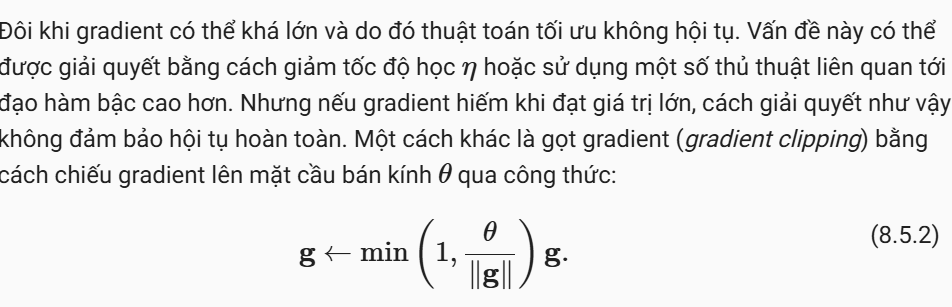

Việc một chuỗi có T độ dài và chúng ta cập nhật bằng T vòng lặp lần dẫn đến chúng có thể bị vashing gradient và explore gradient. Gradient Clipping giải quyết được vấn đề explore gradient, còn vashing sẽ có những pp khác giải quyết nó

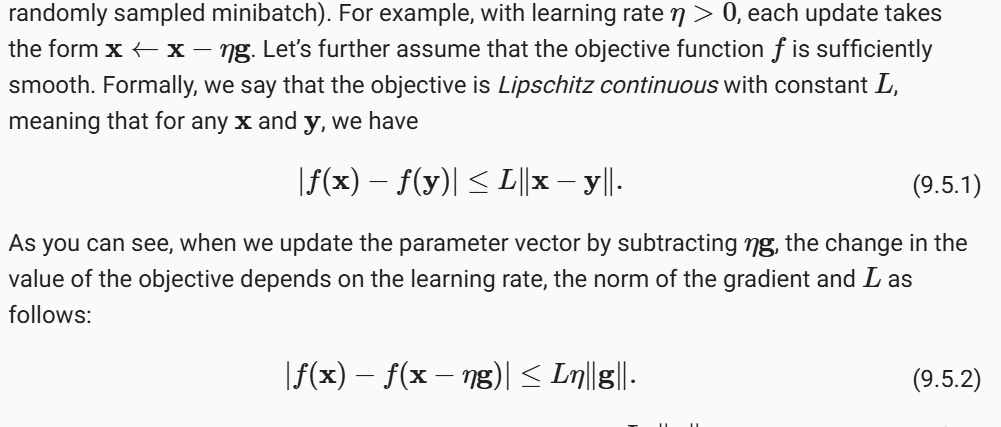

Từ hàm là Lipschitz liên tục, ta thể thấy rằng việc sự thay đổi trong quá trình cập nhật trọng số không thể lớn hơn như biểu thức 9.5.2, vậy khi gradient khá lớn hay lớn chúng để clipping gradient khi mà gradient > grad_clip_val (tức là nó đang bị explore gradient).

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def clip_gradient(self, grad_clip_val, model):
  params = [p for p in model.parameters() if p.requires_grad]
  norm = torch.sqrt(sum(torch.sum((p.grad**2)) for p in params)) # ||g||
  if norm > grad_clip_val: # ||g|| > grad_clip_val
    for param in params:
      param.grad[:] *= grad_clip_val/norm

KeyboardInterrupt: 

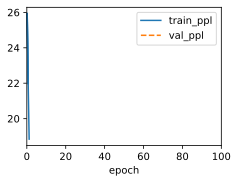

In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
print(len(data.vocab))
rnn = RNNScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLMScratch(rnn, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

## Decoding ( Predict)

Đoạn văn trên mô tả cách sử dụng mô hình ngôn ngữ để dự đoán các ký tự tiếp theo trong một chuỗi văn bản, đặc biệt là khi có tiền tố do người dùng cung cấp. Có hai giai đoạn chính:

1. **Giai đoạn khởi động**: Khi nhận được tiền tố từ người dùng, mô hình sẽ tiếp nhận từng ký tự trong tiền tố mà không tạo ra đầu ra. Thay vào đó, mô hình chỉ cập nhật trạng thái ẩn của nó để chuẩn bị cho việc tạo ra các ký tự tiếp theo.

2. **Giai đoạn tạo văn bản**: Sau khi đã xử lý xong tiền tố, mô hình bắt đầu dự đoán các ký tự tiếp theo. Mỗi ký tự được tạo ra sẽ được đưa trở lại mô hình làm đầu vào cho bước tiếp theo, để tiếp tục tạo ra các ký tự tiếp theo trong chuỗi văn bản.

Phương pháp này hữu ích trong các ứng dụng như tự động hoàn thành trong công cụ tìm kiếm hoặc hỗ trợ viết email, nơi mà việc dự đoán dựa trên ngữ cảnh trước đó là cần thiết.

In [ ]:
@d2l.add_to_class(RNNLMScratch)  #@save
def predict(self, prefix, num_preds, vocab, device=None):
    state, outputs = None, [vocab[prefix[0]]]
    for i in range(len(prefix) + num_preds - 1):
        X = torch.tensor([[outputs[-1]]], device=device)
        embs = self.one_hot(X)
        rnn_outputs, state = self.rnn(embs, state)
        if i < len(prefix) - 1:  # Warm-up period
            outputs.append(vocab[prefix[i + 1]])
        else:  # Predict num_preds steps
            Y = self.output_layer(rnn_outputs)
            outputs.append(int(Y.argmax(axis=2).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

##  Exercises

In [ ]:
model.predict('it has', 20, data.vocab)

'it has and the time time t'

1. Does the implemented language model predict the next token based on all the past tokens up to the very first token in The Time Machine? [Mô hình ngôn ngữ được triển khai có dự đoán mã thông báo tiếp theo dựa trên tất cả các mã thông báo trong quá khứ cho đến mã thông báo đầu tiên trong Cỗ máy thời gian không?] x

2. Which hyperparameter controls the length of history used for prediction? [Siêu tham số nào kiểm soát độ dài lịch sử được sử dụng để dự đoán?] x

3. Show that one-hot encoding is equivalent to picking a different embedding for each object. [Chứng minh rằng mã hóa một lần tương đương với việc chọn một cách nhúng khác nhau cho từng đối tượng.] x

4. Adjust the hyperparameters (e.g., number of epochs, number of hidden units, number of time steps in a minibatch, and learning rate) to improve the perplexity. How low can you go while sticking with this simple architecture? [Điều chỉnh các siêu tham số (ví dụ: số kỷ nguyên, số lượng đơn vị ẩn, số bước thời gian trong một minibatch và tốc độ học tập) để cải thiện độ phức tạp. Bạn có thể đi thấp đến mức nào khi vẫn gắn bó với kiến ​​trúc đơn giản này?] x

5. Replace one-hot encoding with learnable embeddings. Does this lead to better performance? [Thay thế mã hóa một lần bằng các phần nhúng có thể học được. Điều này có dẫn đến hiệu suất tốt hơn không?] x

6. Conduct an experiment to determine how well this language model trained on The Time Machine works on other books by H. G. Wells, e.g., The War of the Worlds. [Tiến hành một thử nghiệm để xác định xem mô hình ngôn ngữ được đào tạo về Cỗ máy thời gian này hoạt động tốt như thế nào trên các cuốn sách khác của H. G. Wells, ví dụ: The War of the Worlds.] x

7. Conduct another experiment to evaluate the perplexity of this model on books written by other authors. [Tiến hành một thí nghiệm khác để đánh giá mức độ phức tạp của mô hình này trên các cuốn sách do các tác giả khác viết.] x

In [ ]:
import torch
import torch.nn.functional as F

# Create a tensor of indices representing the categories A, B, C, and D
indices = torch.tensor([0, 1, 2, 3])

# Create a one-hot encoded tensor from the indices
one_hot = F.one_hot(indices)

# Create an embedding matrix of size 4 x 3
embedding = torch.tensor([[0.2, -0.5, 0.7],
                          [-0.1, 0.3, -0.6],
                          [0.4, -0.2, 0.1],
                          [-0.3, 0.6, -0.4]])

result = torch.matmul(one_hot[2].float(), embedding)
# Print the result
print(one_hot)
print(result)

tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])
tensor([ 0.4000, -0.2000,  0.1000])


4.

In [ ]:
import numpy as np
import sys
import torch.nn as nn
import torch
import warnings
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
from d2l import torch as d2l
from torchsummary import summary
from torch.nn import functional as F
from sklearn.model_selection import ParameterGrid
warnings.filterwarnings("ignore")

class RNNScratch(d2l.Module):  #@save
    """The RNN model implemented from scratch."""
    def __init__(self, num_inputs, num_hiddens, sigma=0.01, plot_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.W_xh = nn.Parameter(
            torch.randn(num_inputs, num_hiddens) * sigma)
        self.W_hh = nn.Parameter(
            torch.randn(num_hiddens, num_hiddens) * sigma)
        self.b_h = nn.Parameter(torch.zeros(num_hiddens))

    def forward(self, inputs, state=None):
        if state is None:
            # Initial state with shape: (batch_size, num_hiddens)
            state = torch.zeros((inputs.shape[1], self.num_hiddens),
                              device=inputs.device)
        else:
            state, = state
        outputs = []
        for X in inputs:  # Shape of inputs: (num_steps, batch_size, num_inputs)
            state = torch.tanh(torch.matmul(X, self.W_xh) +
                             torch.matmul(state, self.W_hh) + self.b_h)
            outputs.append(state)
        return outputs, state

class RNNLMScratch(d2l.Classifier):  #@save
    """The RNN-based language model implemented from scratch."""
    def __init__(self, rnn, vocab_size, lr=0.01, plot_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch, plot_flag=True):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch, plot_flag=True):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)
        return l

    def one_hot(self, X):
        # Output shape: (num_steps, batch_size, vocab_size)
        return F.one_hot(X.T, self.vocab_size).type(torch.float32)

    def output_layer(self, rnn_outputs):
        outputs = [torch.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
        return torch.stack(outputs, 1)

    def forward(self, X, state=None):
        embs = self.one_hot(X)
        rnn_outputs, _ = self.rnn(embs, state)
        return self.output_layer(rnn_outputs)

    def predict(self, prefix, num_preds, vocab, device=None):
        """Defined in :numref:`sec_rnn-scratch`"""
        state, outputs = None, [vocab[prefix[0]]]
        for i in range(len(prefix) + num_preds - 1):
            X = torch.tensor([[outputs[-1]]], device=device)
            embs = self.one_hot(X)
            rnn_outputs, state = self.rnn(embs, state)
            if i < len(prefix) - 1:  # Warm-up period
                outputs.append(vocab[prefix[i + 1]])
            else:  # Predict num_preds steps
                Y = self.output_layer(rnn_outputs)
                outputs.append(int(d2l.reshape(torch.argmax(Y, axis=2), 1)))
        return ''.join([vocab.idx_to_token[i] for i in outputs])

def experient(num_steps=32, num_hiddens=32, lr=1):
    data = d2l.TimeMachine(batch_size=1024, num_steps=num_steps)
    rnn = RNNScratch(num_inputs=len(data.vocab), num_hiddens=num_hiddens)
    model = RNNLMScratch(rnn, vocab_size=len(data.vocab), lr=lr)
    trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1) #, num_gpus=1
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    y_hat = model(X)
    return torch.exp(model.loss(y_hat,y)).item()

In [ ]:
param_grid = {'num_steps':[8, 16, 32, 64, 128],
              'num_hiddens':[8, 16, 32, 64, 128],
              'lr':[0.01,0.1,1,10]}
param_grid_obj = ParameterGrid(param_grid)
ppls = []
for params in param_grid_obj:
    ppl = experient(**params)
    ppls.append(ppl)
    print(params, ppl)

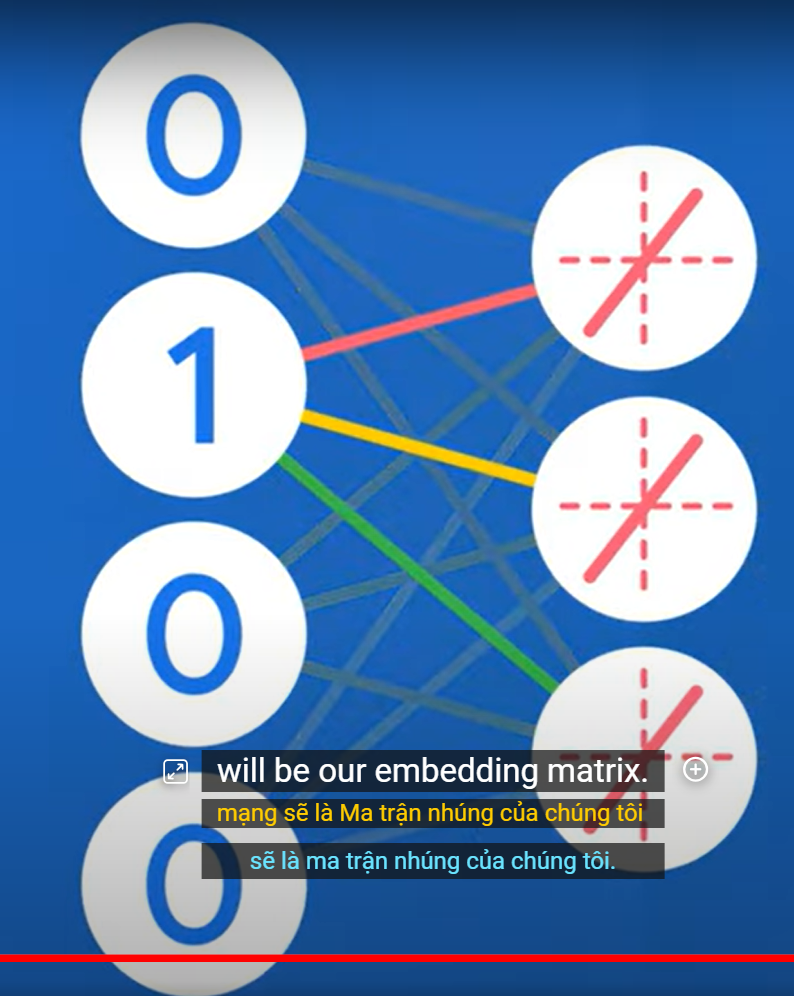

In [ ]:
class EmbRNNLMScratch(d2l.Classifier):
    """The RNN-based language model implemented from scratch."""
    def __init__(self, rnn, vocab_size, lr=0.01, plot_flag=True, emb_len=8):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()
        # Initialize embedding layer
        self.embedding = nn.Embedding(vocab_size, emb_len)

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(self.rnn.num_hiddens, self.emb_len) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.emb_len))
        self.lembs = nn.Parameter(torch.randn(self.vocab_size, self.emb_len))

    def forward(self, X, state=None):
        # Use learnable embedding instead of one-hot encoding
        embs = self.embedding(X)
        rnn_outputs, _ = self.rnn(embs, state)
        return self.output_layer(rnn_outputs)

    def training_step(self, batch, plot_flag=True):
        l = self.loss(self(*batch[:-1]), batch[-1])
        if plot_flag:
            self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch, plot_flag=True):
        l = self.loss(self(*batch[:-1]), batch[-1])
        if plot_flag:
            self.plot('ppl', torch.exp(l), train=False)
        return l

    def output_layer(self, rnn_outputs):
        outputs = [torch.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
        return torch.stack(outputs, 1)


In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNNScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = EmbRNNLMScratch(rnn, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

RuntimeError: shape '[28, 32]' is invalid for input of size 262144

Modify the prediction method so as to use sampling rather than picking the most likely next character. [Sửa đổi phương pháp dự đoán để sử dụng lấy mẫu thay vì chọn ký tự tiếp theo có khả năng xảy ra nhất.]

In [ ]:
weights = torch.tensor([0, 10, 3, 0], dtype=torch.float) # create a tensor of weights
torch.multinomial(weights, num_samples=4)

tensor([1, 2, 0, 3])

In [ ]:
class SampRNNLMScratch(RNNLMScratch):
    def predict(self, prefix, num_preds, vocab, device=None, alpha=1, sample=False):
        """Defined in :numref:`sec_rnn-scratch`"""
        state, outputs = None, [vocab.token_to_idx[prefix[0]]]
        for i in range(len(prefix) + num_preds - 1):
            X = torch.tensor([[outputs[-1]]], device=device)
            embs = self.embedding(X)
            rnn_outputs, state = self.rnn(embs, state)
            if i < len(prefix) - 1:  # Warm-up period
                outputs.append(vocab[prefix[i + 1]])
            else:  # Predict num_preds steps
                Y = self.output_layer(rnn_outputs)
                if sample:
                    prob = F.softmax(Y[0],dim=-1)
                    prob = prob.pow(alpha)
                    # print(prob.shape,prob.sum(dim=-1).shape)
                    # Normalize the probabilities
                    prob /= prob.sum(dim=-1).reshape(-1,1)
                    # outputs.append(model.one_hot(torch.multinomial(prob, num_samples=1)))
                    # print(torch.multinomial(prob, num_samples=1).shape)
                    outputs.append(torch.multinomial(prob, num_samples=1))
                else:
                    outputs.append(torch.argmax(Y, axis=-1))
        return ''.join([vocab.idx_to_token[i] for i in outputs])

KeyboardInterrupt: 

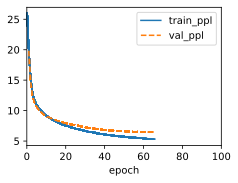

In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
emb_len=len(data.vocab)
rnn = RNNScratch(num_inputs=emb_len, num_hiddens=32)
model = SampRNNLMScratch(rnn, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1) #, num_gpus=1
trainer.fit(model, data)

In [ ]:
model.predict(prefix='hello', num_preds=32, vocab=data.vocab, sample=True)


AttributeError: 'SampRNNLMScratch' object has no attribute 'one_hot'

In [ ]:
model.predict(prefix='hello', num_preds=32, vocab=data.vocab)


In [ ]:
model.predict(prefix='hello', num_preds=32, vocab=data.vocab, sample=True, alpha=2)


In [ ]:
model.predict(prefix='hello', num_preds=32, vocab=data.vocab, sample=True, alpha=30)


# Concise Implementation of Recurrent Neural Networks

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

class RNN(d2l.Module):
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)
class RNNLM(d2l.RNNLMScratch):
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)

    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)

data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
model.predict('it has', 20, data.vocab)



'it hasjoojjjjjmjrjjjjjmjrj'

Exercise:

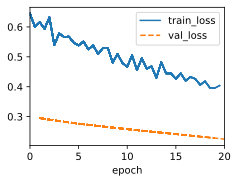

In [ ]:
class Data(d2l.DataModule):
    def __init__(self, batch_size=320, T=1000, num_train=600, tau=4, randn=0.2):
        self.save_hyperparameters()
        self.time = torch.range(1, T, dtype=torch.float32)
        self.x = torch.sin(0.01*self.time) + torch.randn(T)*randn

    def get_dataloader(self, train):
        features = [self.x[i:self.T-self.tau+i] for i in range(self.tau)]
        labels = [self.x[i:self.T-self.tau+i] for i in range(1,self.tau+1)]
        self.features = torch.stack(features, 1).unsqueeze(dim=-1)#.swapaxes(0, 1)
        self.labels = torch.stack(labels, 1).unsqueeze(dim=-1)#.swapaxes(0, 1)
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.features, self.labels], train, i)

class RNN(d2l.Module):  #@save
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

class RNNAutoRegression(d2l.LinearRegression):  #@save
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(1)

    # def output_layer(self, hiddens):
    #     return self.linear(hiddens).swapaxes(0, 1)

    def __init__(self, rnn,lr=0.01, tau=4, plot_flag=True, emb_len=8):
        super().__init__(lr=lr)
        self.save_hyperparameters()
        self.init_params()

    def forward(self, X, state=None):
        rnn_outputs, _ = self.rnn(X.swapaxes(0, 1), state)
        outputs = [self.linear(H) for H in rnn_outputs]
        return torch.stack(outputs, 1)
tau=4
data = Data(tau=tau)
rnn = RNN(num_inputs=1, num_hiddens=8)
model = RNNAutoRegression(rnn=rnn, lr=0.01)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

2. Implement the autoregressive model of Section 9.1 using an RNN.

# Backpropagation Through Time¶


Ghi vào notebook

Exerciser xem ở đây [link text](https://pandalab.me/archives/backpropagation_through_time)

#  Long Short-Term Memory (LSTM)

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xi, self.W_hi, self.b_i = triple()  # Input gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input node

In [ ]:
@d2l.add_to_class(LSTMScratch)
def forward(self, inputs, H_C=None):
    if H_C is None:
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),
                      device=inputs.device)
        C = torch.zeros((inputs.shape[1], self.num_hiddens),
                      device=inputs.device)
    else:
        H, C = H_C
    outputs = []
    for X in inputs:
        I = torch.sigmoid(torch.matmul(X, self.W_xi) +
                        torch.matmul(H, self.W_hi) + self.b_i)
        F = torch.sigmoid(torch.matmul(X, self.W_xf) +
                        torch.matmul(H, self.W_hf) + self.b_f)
        O = torch.sigmoid(torch.matmul(X, self.W_xo) +
                        torch.matmul(H, self.W_ho) + self.b_o)
        C_tilde = torch.tanh(torch.matmul(X, self.W_xc) +
                           torch.matmul(H, self.W_hc) + self.b_c)
        C = F * C + I * C_tilde
        H = O * torch.tanh(C)
        outputs.append(H)
    return outputs, (H, C)

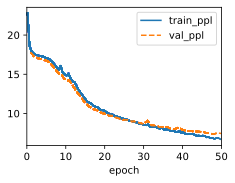

In [ ]:
data =d2l.TimeMachine(batch_size=1024, num_steps=32)
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

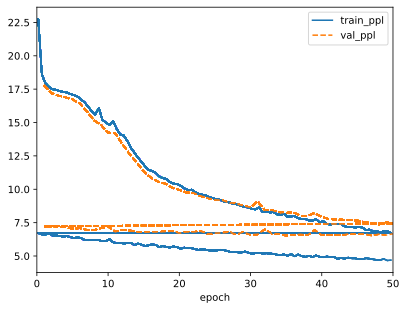

In [ ]:
class LSTM(d2l.RNN):
  def __init__(self, num_inputs, num_hiddens):
    d2l.Module.__init__(self)
    self.save_hyperparameters()
    self.rnn = nn.LSTM(num_inputs, num_hiddens)

  def forward(self, inputs, state=None):
    return self.rnn(inputs, state)

lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), num_hiddens=32)
trainer.fit(model,data)

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has existence the time '

2. How would you need to change the model to generate proper words rather than just sequences of characters?

In [ ]:
class WordTimeMachine(d2l.TimeMachine):
    def _tokenize(self, text):
        return text.split(' ')

# Gated Recurrent Units (GRU) (Nút Hồi tiếp có Cổng )

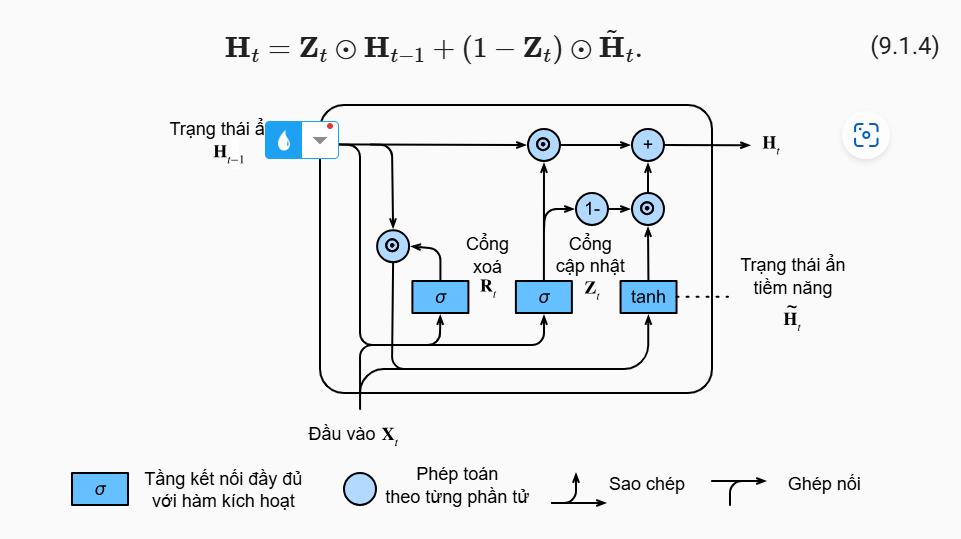

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uni

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
num_inputs, num_hiddens, num_outputs = 784, 256, 10
init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * 0.01)
triple = lambda: (init_weight(num_inputs, num_hiddens),
                      init_weight(num_hiddens, num_hiddens),
                      nn.Parameter(torch.zeros(num_hiddens)))
W_xz, W_hz, b_z = triple()
W_xr, W_hr, b_r = triple()
W_xh, W_hh, b_h = triple()

print(W_xz.shape, W_hz.shape, b_z.shape)

torch.Size([784, 256]) torch.Size([256, 256]) torch.Size([256])


In [ ]:
class GRUScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()

    init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma) # xem output trên sẽ hiểu
    triple = lambda: (init_weight(num_inputs, num_hiddens),
                      init_weight(num_hiddens, num_hiddens),
                      nn.Parameter(torch.zeros(num_hiddens)))
    self.W_xz, self.W_hz, self.b_z = triple()
    self.W_xr, self.W_hr, self.b_r = triple()
    self.W_xh, self.W_hh, self.b_h = triple()

In [ ]:
@d2l.add_to_class(GRUScratch)
def forward(self, inputs, H=None):
    if H is None: # Nếu chưa tồn tại step t nào
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),
                      device=inputs.device)
    outputs = []
    for X in inputs:
        Z = torch.sigmoid(torch.matmul(X, self.W_xz) +
                        torch.matmul(H, self.W_hz) + self.b_z)
        R = torch.sigmoid(torch.matmul(X, self.W_xr) +
                        torch.matmul(H, self.W_hr) + self.b_r)
        H_tilde = torch.tanh(torch.matmul(X, self.W_xh) +
                           torch.matmul(R * H, self.W_hh) + self.b_h)
        H = Z * H + (1 - Z) * H_tilde
        outputs.append(H)
    return outputs, H

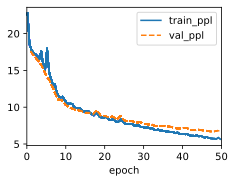

In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
gru = GRUScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLMScratch(gru, vocab_size=len(data.vocab), lr=4)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)
# num_gpus = 1 chỉ định số lượng GPU (Graphics Processing Units) sẽ được sử dụng để huấn luyện mô hình.
# gradient clip_val = 1 là giá trị gradient cho trước nếu giá trị gradient > gradient_clip_val = 1 tránh explore gradient

Concise

In [ ]:
class GRU(d2l.RNN):
  def __init__(self, num_inputs, num_hiddens):
    d2l.Module.__init__(self)
    self.save_hyperparameters()
    self.rnn = nn.GRU(num_inputs, num_hiddens)


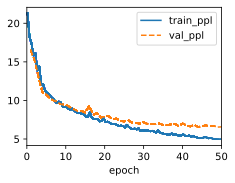

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer.fit(model,data)

vậy các Learnable Embeddings nhằm cùng vị trí với one - hot encoding trong một mô hình NLP hay RNN

Replace one-hot encoding with learnable embeddings. Does this lead to better performance?

vậy ở đây learnable embeddings chính là các Word2Vec, GloVe, FastText

In [ ]:
model.predict('it is the dog', 20, data.vocab, d2l.try_gpu()) # 20 số tokens outputs đầu ra và  Từ vựng được sử dụng để tra cứu và ánh xạ các từ trong mô hình.

# vì out puts predict là các tokens chỉ số number vì chúng không thể ra chữ nên chúng phải quy chiếu kho từ vựng để nó ánh xạ trở lại thành các từ thực tế

'it is the doge traveller the time'

Exercise :

 Giả sử rằng chúng ta chỉ muốn sử dụng đầu vào ở bước thời gian \( t' \) để dự đoán đầu ra ở bước thời gian \( t > t' \). Các giá trị tốt nhất cho các cổng đặt lại và cập nhật cho mỗi bước thời gian là gì?

Nếu chúng ta chỉ muốn sử dụng đầu vào ở bước thời gian \( t' \) để dự đoán đầu ra ở bước thời gian \( t > t' \), sau đó chúng ta muốn bảo tồn trạng thái ẩn \( h_{t'} \) càng nhiều càng tốt và bỏ qua các đầu vào ở các bước thời gian khác. Do đó, các giá trị tốt nhất cho cổng đặt lại và cập nhật là:

1. **Cho \( k < t' \)**:
    - Chúng tôi thiết lập \( z_k = 0 \) và \( r_k = 0 \). Điều này có nghĩa là chúng tôi hoàn toàn không cập nhật trạng thái ẩn và chúng tôi không sử dụng trạng thái ẩn trước đó để tính trạng thái ẩn của ứng viên. Trạng thái ẩn vẫn là giá trị ban đầu \( h_0 \) cho đến bước thời gian \( t' \).

2. **Cho \( k = t' \)**:
    - Chúng tôi thiết lập \( z_{t'} = 0 \) và \( r_{t'} = 1 \). Điều này có nghĩa là chúng tôi không cập nhật trạng thái ẩn với trạng thái ẩn ứng cử viên, nhưng chúng tôi sử dụng trạng thái ẩn trước đó \( h_0 \) để tính toán trạng thái ẩn của ứng viên. Trạng thái ẩn ứng viên trở thành một hàm của đầu vào ở bước thời gian \( t' \) và giá trị ban đầu \( h_0 \). Trạng thái ẩn vẫn như \( h_{t'} = \frac{M_{t'} x_0}{\|M_{t'} x_0\|} \).

3. **Cho \( k > t' \)**:
    - Chúng tôi thiết lập \( z_k = 1 \) và \( r_k = 0 \). Điều này có nghĩa là chúng tôi cập nhật trạng thái ẩn với trạng thái ẩn ứng viên, nhưng chúng tôi không sử dụng trạng thái ẩn trước đó để tính trạng thái ẩn của ứng viên. Trạng thái ẩn ứng viên trở thành một hàm chỉ của đầu vào ở mỗi bước thời gian. Trạng thái ẩn trở thành trung bình có trọng số của trạng thái ẩn ứng cử viên và trạng thái ẩn ở bước thời gian \( t' \). Trạng thái ẩn vẫn gần \( h_{t'} \) miễn là đầu vào không quá lớn.

Bằng cách này, chúng tôi có thể đảm bảo rằng trạng thái ẩn ở bước thời gian \( t \) chủ yếu bị ảnh hưởng bởi đầu vào ở bước thời gian \( t' \) chứ không phải bởi các đầu vào khác.


https://pandalab.me/archives/gru#assume-that-we-only-want-to-use-the-input-at-time-step-t-to-predict-the-output-at-time-step-tgt-t.-what-are-the-best-values-for-the-reset-and-update-gates-for-each-time-step